In [1]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta
import warnings
warnings.filterwarnings('ignore')

In [2]:
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500['Symbol'] = sp500['Symbol'].str.replace('.','-')
symbols_list = sp500['Symbol'].unique().tolist() # not free of survivorship bias
symbols_list

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CHRW',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CAG'

In [3]:
end_date = '2024-06-01'
# end_date = '2023-09-27'
start_date = pd.to_datetime(end_date) -pd.DateOffset(8*365) # 8 years of data

In [4]:
sp500_index =yf.download(tickers=['^GSPC'],start=start_date,end=end_date)


[*********************100%%**********************]  1 of 1 completed


In [5]:
sp500_index

Open         High          Low        Close    Adj Close  \
Date                                                                          
2016-06-03  2104.070068  2104.070068  2085.360107  2099.129883  2099.129883   
2016-06-06  2100.830078  2113.360107  2100.830078  2109.409912  2109.409912   
2016-06-07  2110.179932  2119.219971  2110.179932  2112.129883  2112.129883   
2016-06-08  2112.709961  2120.550049  2112.709961  2119.120117  2119.120117   
2016-06-09  2115.649902  2117.639893  2107.729980  2115.479980  2115.479980   
...                 ...          ...          ...          ...          ...   
2024-05-24  5281.450195  5311.649902  5278.390137  5304.720215  5304.720215   
2024-05-28  5315.910156  5315.910156  5280.890137  5306.040039  5306.040039   
2024-05-29  5278.729980  5282.270020  5262.700195  5266.950195  5266.950195   
2024-05-30  5259.770020  5260.209961  5222.100098  5235.479980  5235.479980   
2024-05-31  5243.209961  5280.330078  5191.680176  5277.509766  5277.509766   

                Volume  
Date                    
2016-06-03  3627780000  
2016-06-06  3442020000  
2016-06-07  3534730000  
2016-06-08  3562060000  
2016-06-09  3290320000  
...                ...  
2024-05-24  3005510000  
2024-05-28  3751540000  
2024-05-29  3552750000  
2024-05-30  3818750000  
2024-05-31  5437160000  

[2012 rows x 6 columns]

Text(0.5, 1.0, 'S&P 500 Index Values')

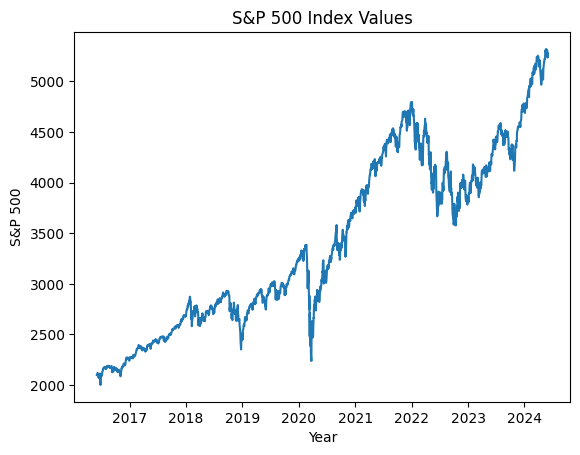

In [6]:
plt.plot(sp500_index['Adj Close'])
plt.xlabel('Year')
plt.ylabel('S&P 500')
plt.title('S&P 500 Index Values')

In [7]:
# df =yf.download(tickers=symbols_list,start=start_date,end=end_date)
# df.to_pickle('data.pkl')
df = pd.read_pickle('data.pkl')

In [8]:
df = df.stack()
df 

Price               Adj Close       Close        High         Low        Open  \
Date       Ticker                                                               
2015-09-29 A        31.483555   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361618   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.684574   27.264999   28.377501   26.965000   28.207500   
           ABBV     36.334908   52.790001   54.189999   51.880001   53.099998   
           ABT      33.478683   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 XYL      88.736298   89.519997   90.849998   89.500000   90.379997   
           YUM     122.211006  124.010002  124.739998  123.449997  124.239998   
           ZBH     111.782722  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZTS     175.547699  176.869995  178.449997  176.270004  176.580002   

Price                   Volume  
Date       Ticker               
2015-09-29 A         2252400.0  
           AAL       7478800.0  
           AAPL    293461600.0  
           ABBV     12842800.0  
           ABT      12287500.0  
...                        ...  
2023-09-26 XYL       1322400.0  
           YUM       1500600.0  
           ZBH       3610500.0  
           ZBRA       355400.0  
           ZTS       1463200.0  

[988898 rows x 6 columns]

In [9]:
df.index.names

FrozenList(['Date', 'Ticker'])

In [10]:
df.index.names = ['date','ticker']
df.head()

Price              Adj Close      Close       High        Low       Open  \
date       ticker                                                          
2015-09-29 A       31.483555  33.740002  34.060001  33.240002  33.360001   
           AAL     37.361618  39.180000  39.770000  38.790001  39.049999   
           AAPL    24.684574  27.264999  28.377501  26.965000  28.207500   
           ABBV    36.334908  52.790001  54.189999  51.880001  53.099998   
           ABT     33.478683  39.500000  40.150002  39.029999  39.259998   

Price                   Volume  
date       ticker               
2015-09-29 A         2252400.0  
           AAL       7478800.0  
           AAPL    293461600.0  
           ABBV     12842800.0  
           ABT      12287500.0

In [11]:
df.columns = df.columns.str.lower()
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.483555   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361618   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.684574   27.264999   28.377501   26.965000   28.207500   
           ABBV     36.334908   52.790001   54.189999   51.880001   53.099998   
           ABT      33.478683   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 XYL      88.736298   89.519997   90.849998   89.500000   90.379997   
           YUM     122.211006  124.010002  124.739998  123.449997  124.239998   
           ZBH     111.782722  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZTS     175.547699  176.869995  178.449997  176.270004  176.580002   

Price                   volume  
date       ticker               
2015-09-29 A         2252400.0  
           AAL       7478800.0  
           AAPL    293461600.0  
           ABBV     12842800.0  
           ABT      12287500.0  
...                        ...  
2023-09-26 XYL       1322400.0  
           YUM       1500600.0  
           ZBH       3610500.0  
           ZBRA       355400.0  
           ZTS       1463200.0  

[988898 rows x 6 columns]

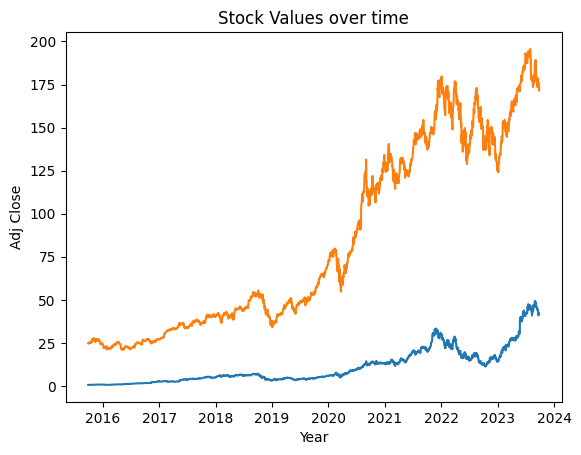

In [12]:
plt.plot(df.xs('NVDA',level=1)['adj close'])
plt.plot(df.xs('AAPL',level=1)['adj close'])
plt.xlabel('Year')
plt.ylabel('Adj Close')
plt.title('Stock Values over time');

### Calculate Features and Technical Indicators

#### Garman-Klass Volatility
Volatility: A statistical measure of the dispersion of returns for a given security or market index. It represents the degree of variation of trading prices.
<br>
Garman-Klass Volatility: A specific method to estimate volatility using high, low, opening, and closing prices. It incorporates both intra-day price range and overnight price changes.

In [13]:
df['garman_klass_vol'] = ((np.log(df['high'])-np.log(df['low']))**2)/2-(2*np.log(2)-1)*((np.log(df['adj close'])-np.log(df['open']))**2)
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.483555   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361618   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.684574   27.264999   28.377501   26.965000   28.207500   
           ABBV     36.334908   52.790001   54.189999   51.880001   53.099998   
           ABT      33.478683   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 XYL      88.736298   89.519997   90.849998   89.500000   90.379997   
           YUM     122.211006  124.010002  124.739998  123.449997  124.239998   
           ZBH     111.782722  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZTS     175.547699  176.869995  178.449997  176.270004  176.580002   

Price                   volume  garman_klass_vol  
date       ticker                                 
2015-09-29 A         2252400.0         -0.000998  
           AAL       7478800.0         -0.000443  
           AAPL    293461600.0         -0.005572  
           ABBV     12842800.0         -0.054655  
           ABT      12287500.0         -0.009402  
...                        ...               ...  
2023-09-26 XYL       1322400.0         -0.000018  
           YUM       1500600.0         -0.000051  
           ZBH       3610500.0          0.000099  
           ZBRA       355400.0          0.000133  
           ZTS       1463200.0          0.000062  

[988898 rows x 7 columns]

#### Relative Strength Index (RSI):
RSI: A momentum oscillator that measures the speed and change of price movements. It oscillates between 0 and 100.
<br>
Overbought and Oversold: Typically, an RSI above 70 indicates that a stock might be overbought (potentially overvalued), and an RSI below 30 suggests it might be oversold (potentially undervalued).

<Axes: xlabel='date'>

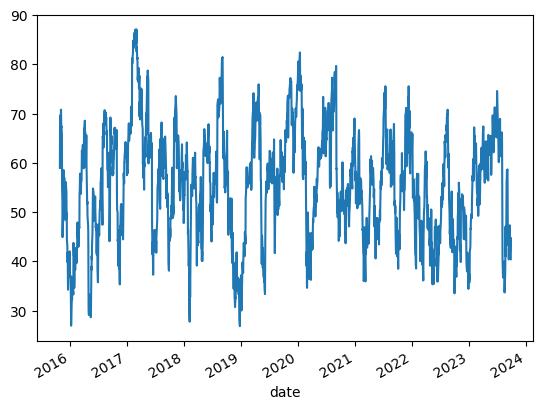

In [14]:
df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))
df.xs('AAPL',level=1)['rsi'].plot() # RSI of apple stock

#### Bollinger Bands
Bollinger Bands: A volatility indicator that consists of a middle band (usually a simple moving average), an upper band, and a lower band (standard deviations away from the middle band).
<br>
Price Range: Bollinger Bands help identify periods of high or low volatility and potential overbought or oversold conditions.

In [15]:
df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,0])

In [16]:
df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,1])

In [17]:
df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,2])


#### Average True Range (ATR):
ATR: An indicator that measures market volatility by considering the full range of price movements, including gaps between trading sessions.
<br>
Volatility Measurement: ATR is used to understand how much an asset moves on average during a given time period, providing insight into volatility.

In [18]:
def compute_atr(stock_data):
    atr = pandas_ta.atr(high=stock_data['high'],
                        low=stock_data['low'],
                        close=stock_data['close'],
                        length=14)
    return atr.sub(atr.mean()).div(atr.std())

df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)

#### Moving Average Convergence Divergence (MACD):
MACD: A trend-following momentum indicator that shows the relationship between two moving averages of a security’s price.
<br>
Signal Line: MACD is often plotted with a signal line (a moving average of the MACD itself) to act as a trigger for buy and sell signals.<br>
Trend Identification: MACD helps identify changes in the strength, direction, momentum, and duration of a trend in the stock's price.

In [19]:
def compute_macd(close):
    macd = pandas_ta.macd(close=close, length=20).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())

df['macd'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_macd)

In [20]:
df['dollar_volume'] = (df['adj close']*df['volume'])/1e6

In [21]:
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.483555   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361618   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.684574   27.264999   28.377501   26.965000   28.207500   
           ABBV     36.334908   52.790001   54.189999   51.880001   53.099998   
           ABT      33.478683   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 XYL      88.736298   89.519997   90.849998   89.500000   90.379997   
           YUM     122.211006  124.010002  124.739998  123.449997  124.239998   
           ZBH     111.782722  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZTS     175.547699  176.869995  178.449997  176.270004  176.580002   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2015-09-29 A         2252400.0         -0.000998        NaN       NaN   
           AAL       7478800.0         -0.000443        NaN       NaN   
           AAPL    293461600.0         -0.005572        NaN       NaN   
           ABBV     12842800.0         -0.054655        NaN       NaN   
           ABT      12287500.0         -0.009402        NaN       NaN   
...                        ...               ...        ...       ...   
2023-09-26 XYL       1322400.0         -0.000018  26.146725  4.485761   
           YUM       1500600.0         -0.000051  36.057150  4.811707   
           ZBH       3610500.0          0.000099  31.893261  4.748085   
           ZBRA       355400.0          0.000133  29.494977  5.400991   
           ZTS       1463200.0          0.000062  42.623462  5.156108   

Price                bb_mid   bb_high       atr      macd  dollar_volume  
date       ticker                                                         
2015-09-29 A            NaN       NaN       NaN       NaN      70.913559  
           AAL          NaN       NaN       NaN       NaN     279.420069  
           AAPL         NaN       NaN       NaN       NaN    7243.974619  
           ABBV         NaN       NaN       NaN       NaN     466.641950  
           ABT          NaN       NaN       NaN       NaN     411.369323  
...                     ...       ...       ...       ...            ...  
2023-09-26 XYL     4.567684  4.649607  0.033800 -2.159189     117.344880  
           YUM     4.841672  4.871637  0.142547 -1.363696     183.389836  
           ZBH     4.787752  4.827420 -0.381708 -0.881067     403.591519  
           ZBRA    5.539167  5.677342 -0.057389 -1.600791      79.595386  
           ZTS     5.214922  5.273735  0.651515 -1.188278     256.861393  

[988898 rows x 14 columns]

#### Aggregate to monthly level and filter top 150 most liquid stocks for each month.
To reduce training time and experiment with features and strategies, we convert the business-daily data to month-end frequency.


In [22]:
df_dollar = df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume')
df_dollar
# do the same for other columns

dollar_volume
date       ticker               
2015-09-30 A           76.231388
           AAL        432.668959
           AAPL      6941.015156
           ABBV       456.063763
           ABT        388.917846
...                          ...
2023-09-30 OTIS       154.361755
           ABNB      1633.500725
           CEG        196.670368
           GEHC       212.275850
           KVUE       677.910279

[47673 rows x 1 columns]

In [23]:
last_cols = ['adj close',
 'garman_klass_vol',
 'rsi',
 'bb_low',
 'bb_mid',
 'bb_high',
 'atr',
 'macd']
last_cols

['adj close',
 'garman_klass_vol',
 'rsi',
 'bb_low',
 'bb_mid',
 'bb_high',
 'atr',
 'macd']

In [24]:
df_last_cols = df.unstack()[last_cols].resample('M').last().stack('ticker')
df_last_cols

Price               adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2015-09-30 A        32.034103         -0.001231        NaN       NaN   
           AAL      37.027866          0.000050        NaN       NaN   
           AAPL     24.965233         -0.003403        NaN       NaN   
           ABBV     37.449924         -0.049127        NaN       NaN   
           ABT      34.088943         -0.009146        NaN       NaN   
...                       ...               ...        ...       ...   
2023-09-30 XYL      88.736298         -0.000018  26.146725  4.485761   
           YUM     122.211006         -0.000051  36.057150  4.811707   
           ZBH     111.782722          0.000099  31.893261  4.748085   
           ZBRA    223.960007          0.000133  29.494977  5.400991   
           ZTS     175.547699          0.000062  42.623462  5.156108   

Price                bb_mid   bb_high       atr      macd  
date       ticker                                          
2015-09-30 A            NaN       NaN       NaN       NaN  
           AAL          NaN       NaN       NaN       NaN  
           AAPL         NaN       NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN       NaN  
           ABT          NaN       NaN       NaN       NaN  
...                     ...       ...       ...       ...  
2023-09-30 XYL     4.567684  4.649607  0.033800 -2.159189  
           YUM     4.841672  4.871637  0.142547 -1.363696  
           ZBH     4.787752  4.827420 -0.381708 -0.881067  
           ZBRA    5.539167  5.677342 -0.057389 -1.600791  
           ZTS     5.214922  5.273735  0.651515 -1.188278  

[47673 rows x 8 columns]

In [25]:
data = (pd.concat([df_dollar,df_last_cols],axis=1)).dropna()
data

dollar_volume   adj close  garman_klass_vol        rsi  \
date       ticker                                                           
2015-11-30 A          135.992827   39.023193         -0.001992  73.421547   
           AAL        287.915801   39.429932         -0.000966  40.718990   
           AAPL      4029.441861   26.890556         -0.003209  55.537298   
           ABBV       337.563911   40.393524         -0.059549  49.376841   
           ABT        211.659043   38.293564         -0.011216  56.962497   
...                          ...         ...               ...        ...   
2023-09-30 OTIS       154.361755   78.356499         -0.000097  33.116230   
           ABNB      1633.500725  132.279999          0.000213  44.494127   
           CEG        196.670368  107.862022          0.000131  55.245465   
           GEHC       212.275850   66.130219          0.000185  40.922335   
           KVUE       677.910279   20.218124          0.000032  35.706315   

                     bb_low    bb_mid   bb_high       atr      macd  
date       ticker                                                    
2015-11-30 A       3.545992  3.618440  3.690888 -1.033887  0.567157  
           AAL     3.672028  3.749832  3.827636  0.190822 -0.418771  
           AAPL    3.282983  3.326297  3.369611 -0.967900 -0.142790  
           ABBV    3.726695  3.774943  3.823191 -0.526809  0.145677  
           ABT     3.656055  3.677909  3.699763 -1.064842  0.335558  
...                     ...       ...       ...       ...       ...  
2023-09-30 OTIS    4.370137  4.415425  4.460712 -1.028320 -1.534536  
           ABNB    4.857047  4.940924  5.024801 -1.006939 -0.037854  
           CEG     4.652147  4.692320  4.732493 -0.436215  0.366876  
           GEHC    4.155436  4.212972  4.270508 -0.893478 -1.116463  
           KVUE    3.024299  3.099281  3.174263 -0.899746 -1.435620  

[46692 rows x 9 columns]

Calculate 5-year rolling average of dollar volume for each stocks before filtering.
<br>
It is used to smooth out fluctuations in dollar volume data by averaging the values over a 5-year window. This helps to identify long-term trends and reduce the impact of short-term volatility.

In [26]:
data['dollar_volume'] = data.loc[:, 'dollar_volume'].unstack('ticker').rolling(5*12, min_periods=12).mean().stack()
# data.groupby('date')['dollar_volume'].head()	

In [27]:
data['dollar_volume']

date        ticker
2015-11-30  A                NaN
            AAL              NaN
            AAPL             NaN
            ABBV             NaN
            ABT              NaN
                         ...    
2023-09-30  OTIS      170.554430
            ABNB      909.311388
            CEG       175.122166
            GEHC             NaN
            KVUE             NaN
Name: dollar_volume, Length: 46692, dtype: float64

Rank the dollar volume for each month, then we can take the top 150
<br>
Stocks with lower dollar volume will have higher rank

In [28]:
data['dollar_vol_rank'] = (data.groupby('date')['dollar_volume'].rank(ascending=False))
data['dollar_vol_rank']

date        ticker
2015-11-30  A           NaN
            AAL         NaN
            AAPL        NaN
            ABBV        NaN
            ABT         NaN
                      ...  
2023-09-30  OTIS      276.0
            ABNB       37.0
            CEG       264.0
            GEHC        NaN
            KVUE        NaN
Name: dollar_vol_rank, Length: 46692, dtype: float64

Take the top 150 ranked stocks

In [29]:
data = data[data['dollar_vol_rank']<150].drop(['dollar_volume', 'dollar_vol_rank'], axis=1)

In [30]:
data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2016-10-31 AAL      39.134331         -0.000176  62.203562  3.604673   
           AAPL     26.248028         -0.002384  49.891093  3.295542   
           ABBV     40.245121         -0.046691  27.477664  3.753446   
           ABT      34.293457         -0.007492  38.008885  3.554632   
           ACN     103.569618         -0.004643  53.823653  4.637342   
...                       ...               ...        ...       ...   
2023-09-30 WMT      53.597538         -0.000041  54.722521  3.984976   
           XOM     113.372101         -0.000065  59.440180  4.687091   
           MRNA     98.120003          0.000146  38.747314  4.582514   
           UBER     44.270000          0.000441  45.005268  3.806654   
           ABNB    132.279999          0.000213  44.494127  4.857047   

                     bb_mid   bb_high       atr      macd  
date       ticker                                          
2016-10-31 AAL     3.655494  3.706314  0.402199  1.131596  
           AAPL    3.324423  3.353305 -1.038688 -0.195978  
           ABBV    3.807610  3.861774 -0.893132 -0.760594  
           ABT     3.605106  3.655580 -1.035224 -0.650888  
           ACN     4.648980  4.660617 -0.996806 -0.135457  
...                     ...       ...       ...       ...  
2023-09-30 WMT     4.002446  4.019915 -0.196381  0.399459  
           XOM     4.727187  4.767283  0.601335  1.400623  
           MRNA    4.685332  4.788149 -0.529511 -0.376899  
           UBER    3.862227  3.917801 -0.746098 -0.133973  
           ABNB    4.940924  5.024801 -1.006939 -0.037854  

[12516 rows x 8 columns]

#### Calculate Monthly Returns for different time horizons as features.
To capture time series dynamics that reflect, for example, momentum patterns, we compute historical returns using the method .pct_change(lag), that is, returns over various monthly periods as identified by lags.<br>
Looking at returns over different periods (like 1 month, 3 months, 6 months) helps you understand both short-term and long-term performance. This can give you a better picture of how the stock is behaving


In [31]:
def calculate_returns(df):

    outlier_cutoff = 0.005
    lags = [1, 2, 3, 6, 9, 12]

    for lag in lags:
        df[f'return_{lag}m'] = (df['adj close']
                              .pct_change(lag)
                              .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff),
                                                     upper=x.quantile(1-outlier_cutoff)))
                              .add(1)
                              .pow(1/lag)
                              .sub(1))
    return df

In [32]:
data = data.groupby(level=1, group_keys=False).apply(calculate_returns).dropna()

In [33]:
data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2017-10-31 AAL      45.534168         -0.000363  41.051789  3.849110   
           AAPL     39.767773         -0.000998  69.196824  3.596048   
           ABBV     67.491158         -0.034008  55.247890  4.196702   
           ABT      48.493378         -0.005190  53.844909  3.892568   
           ACN     129.399704         -0.003925  69.365079  4.802675   
...                       ...               ...        ...       ...   
2023-09-30 WMT      53.597538         -0.000041  54.722521  3.984976   
           XOM     113.372101         -0.000065  59.440180  4.687091   
           MRNA     98.120003          0.000146  38.747314  4.582514   
           UBER     44.270000          0.000441  45.005268  3.806654   
           ABNB    132.279999          0.000213  44.494127  4.857047   

                     bb_mid   bb_high       atr      macd  return_1m  \
date       ticker                                                      
2017-10-31 AAL     3.921750  3.994389  1.011062 -0.018697  -0.014108   
           AAPL    3.642923  3.689797 -0.906642 -0.039275   0.096808   
           ABBV    4.243063  4.289423  0.375557  0.473814   0.022728   
           ABT     3.916137  3.939707 -1.040044  0.276133   0.021276   
           ACN     4.842354  4.882034 -0.986514  0.352342   0.064180   
...                     ...       ...       ...       ...        ...   
2023-09-30 WMT     4.002446  4.019915 -0.196381  0.399459  -0.000676   
           XOM     4.727187  4.767283  0.601335  1.400623   0.046947   
           MRNA    4.685332  4.788149 -0.529511 -0.376899  -0.132219   
           UBER    3.862227  3.917801 -0.746098 -0.133973  -0.062672   
           ABNB    4.940924  5.024801 -1.006939 -0.037854   0.005549   

                   return_2m  return_3m  return_6m  return_9m  return_12m  
date       ticker                                                          
2017-10-31 AAL      0.022981  -0.023860   0.016495   0.007008    0.012702  
           AAPL     0.015250   0.044955   0.028875   0.038941    0.035228  
           ABBV     0.098590   0.091379   0.056495   0.047273    0.044026  
           ABT      0.034308   0.034801   0.038672   0.031320    0.029294  
           ACN      0.048454   0.037203   0.028692   0.027398    0.018728  
...                      ...        ...        ...        ...         ...  
2023-09-30 WMT      0.010014   0.012354   0.017574   0.016553    0.020256  
           XOM      0.046139   0.030496   0.012838   0.008747    0.027037  
           MRNA    -0.086803  -0.068763  -0.071952  -0.064976   -0.015431  
           UBER    -0.053920   0.008422   0.057244   0.066838    0.043691  
           ABNB    -0.067704   0.010603   0.010289   0.049124    0.019401  

[10347 rows x 14 columns]

### Download Fama-French Factors and Calculate Rolling Factor Betas.
We will introduce the Fama—French data to estimate the exposure of assets to common risk factors using linear regression.<br>
The five Fama—French factors, namely market risk, size, value, operating profitability, and investment have been shown empirically to explain asset returns and are commonly used to assess the risk/return profile of portfolios. Hence, it is natural to include past factor exposures as financial features in models.<br>
We can access the historical factor returns using the pandas-datareader and estimate historical exposures using the RollingOLS rolling linear regression.


In [34]:
factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3',
                               'famafrench',
                               start='2010')[0].drop('RF', axis=1)
factor_data

Mkt-RF   SMB   HML   RMW   CMA
Date                                   
2010-01   -3.36  0.34  0.43 -1.27  0.46
2010-02    3.40  1.51  3.23 -0.27  1.43
2010-03    6.31  1.85  2.21 -0.65  1.69
2010-04    2.00  4.98  2.89  0.69  1.72
2010-05   -7.89  0.04 -2.44  1.30 -0.21
...         ...   ...   ...   ...   ...
2024-01    0.70 -5.74 -2.38  0.69 -0.95
2024-02    5.06 -0.78 -3.49 -1.99 -2.14
2024-03    2.83 -1.16  4.20  1.49  1.17
2024-04   -4.67 -2.55 -0.52  1.49 -0.30
2024-05    4.34  0.59 -1.33  3.21 -2.87

[173 rows x 5 columns]

In [35]:
factor_data.index = factor_data.index.to_timestamp()
factor_data

Mkt-RF   SMB   HML   RMW   CMA
Date                                      
2010-01-01   -3.36  0.34  0.43 -1.27  0.46
2010-02-01    3.40  1.51  3.23 -0.27  1.43
2010-03-01    6.31  1.85  2.21 -0.65  1.69
2010-04-01    2.00  4.98  2.89  0.69  1.72
2010-05-01   -7.89  0.04 -2.44  1.30 -0.21
...            ...   ...   ...   ...   ...
2024-01-01    0.70 -5.74 -2.38  0.69 -0.95
2024-02-01    5.06 -0.78 -3.49 -1.99 -2.14
2024-03-01    2.83 -1.16  4.20  1.49  1.17
2024-04-01   -4.67 -2.55 -0.52  1.49 -0.30
2024-05-01    4.34  0.59 -1.33  3.21 -2.87

[173 rows x 5 columns]

In [36]:
factor_data = factor_data.resample('M').last().div(100)# factors are in %

In [37]:
factor_data.index.name = 'date'

In [38]:
factor_data = factor_data.join(data['return_1m']).sort_index()
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2017-10-31 AAL     0.0225 -0.0194  0.0020  0.0093 -0.0325  -0.014108
           AAPL    0.0225 -0.0194  0.0020  0.0093 -0.0325   0.096808
           ABBV    0.0225 -0.0194  0.0020  0.0093 -0.0325   0.022728
           ABT     0.0225 -0.0194  0.0020  0.0093 -0.0325   0.021276
           ACN     0.0225 -0.0194  0.0020  0.0093 -0.0325   0.064180
...                   ...     ...     ...     ...     ...        ...
2023-09-30 VRTX   -0.0524 -0.0181  0.0151  0.0187 -0.0082   0.009617
           VZ     -0.0524 -0.0181  0.0151  0.0187 -0.0082  -0.056890
           WFC    -0.0524 -0.0181  0.0151  0.0187 -0.0082  -0.015500
           WMT    -0.0524 -0.0181  0.0151  0.0187 -0.0082  -0.000676
           XOM    -0.0524 -0.0181  0.0151  0.0187 -0.0082   0.046947

[10347 rows x 6 columns]

<Axes: xlabel='date'>

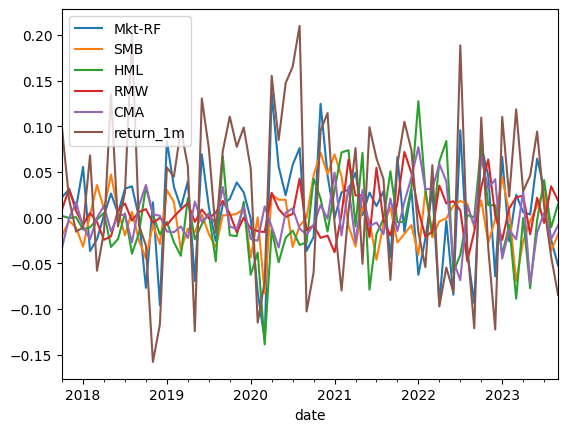

In [39]:
factor_data.xs('AAPL',level=1).plot()

<Axes: xlabel='date'>

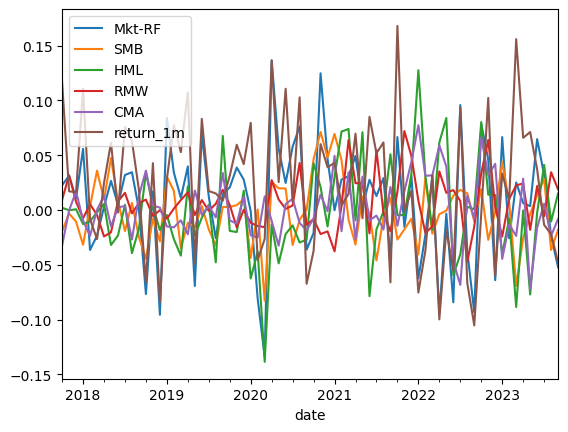

In [40]:
factor_data.xs('MSFT',level=1).plot()

Filter out stocks with less than 10 months of data.

In [41]:
month_count = factor_data.groupby(level=1).size()
month_count

ticker
AAL     72
AAPL    72
ABBV    72
ABNB    10
ABT     72
        ..
WFC     72
WMT     72
WYNN    69
XOM     72
YUM      2
Length: 176, dtype: int64

In [42]:
valid_stocks = month_count[month_count>=10]
valid_stocks #decreased

ticker
AAL     72
AAPL    72
ABBV    72
ABNB    10
ABT     72
        ..
WDC     56
WFC     72
WMT     72
WYNN    69
XOM     72
Length: 169, dtype: int64

In [43]:
factor_data = factor_data[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)]
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2017-10-31 AAL     0.0225 -0.0194  0.0020  0.0093 -0.0325  -0.014108
           AAPL    0.0225 -0.0194  0.0020  0.0093 -0.0325   0.096808
           ABBV    0.0225 -0.0194  0.0020  0.0093 -0.0325   0.022728
           ABT     0.0225 -0.0194  0.0020  0.0093 -0.0325   0.021276
           ACN     0.0225 -0.0194  0.0020  0.0093 -0.0325   0.064180
...                   ...     ...     ...     ...     ...        ...
2023-09-30 VRTX   -0.0524 -0.0181  0.0151  0.0187 -0.0082   0.009617
           VZ     -0.0524 -0.0181  0.0151  0.0187 -0.0082  -0.056890
           WFC    -0.0524 -0.0181  0.0151  0.0187 -0.0082  -0.015500
           WMT    -0.0524 -0.0181  0.0151  0.0187 -0.0082  -0.000676
           XOM    -0.0524 -0.0181  0.0151  0.0187 -0.0082   0.046947

[10319 rows x 6 columns]

### Calculate Rolling Factor Beta values

In [44]:
rolling_beta = (factor_data.groupby(level=1, group_keys=False)
	.apply(lambda x: RollingOLS(endog=x['return_1m'], 
		exog=sm.add_constant(x.drop('return_1m', axis=1)), # append column of 1's
		window=min(24, x.shape[0]), # 24 months or less
		min_nobs=len(x.columns)+1).fit(params_only=True).params.drop('const',axis=1)))

In [45]:
rolling_beta

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                  
2017-10-31 AAL          NaN       NaN       NaN       NaN       NaN
           AAPL         NaN       NaN       NaN       NaN       NaN
           ABBV         NaN       NaN       NaN       NaN       NaN
           ABT          NaN       NaN       NaN       NaN       NaN
           ACN          NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2023-09-30 VRTX    0.456835 -0.444629 -0.314191 -0.077989  0.802008
           VZ      0.332722 -0.166038  0.265929  0.311103  0.108624
           WFC     1.120622  0.297482  2.062608 -0.441342 -1.519517
           WMT     0.700774 -0.313570 -0.413681 -0.141574  0.508838
           XOM     0.983098 -1.094428  1.756406 -0.640016 -0.368887

[10319 rows x 5 columns]

Join the rolling factors data to the main features dataframe

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10347 entries, (Timestamp('2017-10-31 00:00:00'), 'AAL') to (Timestamp('2023-09-30 00:00:00'), 'ABNB')
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   adj close         10347 non-null  float64
 1   garman_klass_vol  10347 non-null  float64
 2   rsi               10347 non-null  float64
 3   bb_low            10347 non-null  float64
 4   bb_mid            10347 non-null  float64
 5   bb_high           10347 non-null  float64
 6   atr               10347 non-null  float64
 7   macd              10347 non-null  float64
 8   return_1m         10347 non-null  float64
 9   return_2m         10347 non-null  float64
 10  return_3m         10347 non-null  float64
 11  return_6m         10347 non-null  float64
 12  return_9m         10347 non-null  float64
 13  return_12m        10347 non-null  float64
dtypes: float64(14)
memory usage: 1.2+ MB


In [47]:
factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']
data = (data.join(rolling_beta.groupby('ticker').shift()))

In [48]:
data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2017-10-31 AAL      45.534168         -0.000363  41.051789  3.849110   
           AAPL     39.767773         -0.000998  69.196824  3.596048   
           ABBV     67.491158         -0.034008  55.247890  4.196702   
           ABT      48.493378         -0.005190  53.844909  3.892568   
           ACN     129.399704         -0.003925  69.365079  4.802675   
...                       ...               ...        ...       ...   
2023-09-30 WMT      53.597538         -0.000041  54.722521  3.984976   
           XOM     113.372101         -0.000065  59.440180  4.687091   
           MRNA     98.120003          0.000146  38.747314  4.582514   
           UBER     44.270000          0.000441  45.005268  3.806654   
           ABNB    132.279999          0.000213  44.494127  4.857047   

                     bb_mid   bb_high       atr      macd  return_1m  \
date       ticker                                                      
2017-10-31 AAL     3.921750  3.994389  1.011062 -0.018697  -0.014108   
           AAPL    3.642923  3.689797 -0.906642 -0.039275   0.096808   
           ABBV    4.243063  4.289423  0.375557  0.473814   0.022728   
           ABT     3.916137  3.939707 -1.040044  0.276133   0.021276   
           ACN     4.842354  4.882034 -0.986514  0.352342   0.064180   
...                     ...       ...       ...       ...        ...   
2023-09-30 WMT     4.002446  4.019915 -0.196381  0.399459  -0.000676   
           XOM     4.727187  4.767283  0.601335  1.400623   0.046947   
           MRNA    4.685332  4.788149 -0.529511 -0.376899  -0.132219   
           UBER    3.862227  3.917801 -0.746098 -0.133973  -0.062672   
           ABNB    4.940924  5.024801 -1.006939 -0.037854   0.005549   

                   return_2m  return_3m  return_6m  return_9m  return_12m  \
date       ticker                                                           
2017-10-31 AAL      0.022981  -0.023860   0.016495   0.007008    0.012702   
           AAPL     0.015250   0.044955   0.028875   0.038941    0.035228   
           ABBV     0.098590   0.091379   0.056495   0.047273    0.044026   
           ABT      0.034308   0.034801   0.038672   0.031320    0.029294   
           ACN      0.048454   0.037203   0.028692   0.027398    0.018728   
...                      ...        ...        ...        ...         ...   
2023-09-30 WMT      0.010014   0.012354   0.017574   0.016553    0.020256   
           XOM      0.046139   0.030496   0.012838   0.008747    0.027037   
           MRNA    -0.086803  -0.068763  -0.071952  -0.064976   -0.015431   
           UBER    -0.053920   0.008422   0.057244   0.066838    0.043691   
           ABNB    -0.067704   0.010603   0.010289   0.049124    0.019401   

                     Mkt-RF       SMB       HML       RMW       CMA  
date       ticker                                                    
2017-10-31 AAL          NaN       NaN       NaN       NaN       NaN  
           AAPL         NaN       NaN       NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN       NaN       NaN  
           ABT          NaN       NaN       NaN       NaN       NaN  
           ACN          NaN       NaN       NaN       NaN       NaN  
...                     ...       ...       ...       ...       ...  
2023-09-30 WMT     0.740244 -0.259780 -0.522483 -0.125198  0.642485  
           XOM     1.005607 -1.051740  1.707637 -0.674966 -0.284575  
           MRNA    1.154879  0.766422 -1.163095  0.593370  0.989911  
           UBER    1.078514  1.163168 -0.257055 -1.482917 -0.449948  
           ABNB         NaN       NaN       NaN       NaN       NaN  

[10347 rows x 19 columns]

In [49]:
data.loc[:, factors] = data.groupby('ticker', group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))

In [50]:
data.head()

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2017-10-31 AAL      45.534168         -0.000363  41.051789  3.849110   
           AAPL     39.767773         -0.000998  69.196824  3.596048   
           ABBV     67.491158         -0.034008  55.247890  4.196702   
           ABT      48.493378         -0.005190  53.844909  3.892568   
           ACN     129.399704         -0.003925  69.365079  4.802675   

                     bb_mid   bb_high       atr      macd  return_1m  \
date       ticker                                                      
2017-10-31 AAL     3.921750  3.994389  1.011062 -0.018697  -0.014108   
           AAPL    3.642923  3.689797 -0.906642 -0.039275   0.096808   
           ABBV    4.243063  4.289423  0.375557  0.473814   0.022728   
           ABT     3.916137  3.939707 -1.040044  0.276133   0.021276   
           ACN     4.842354  4.882034 -0.986514  0.352342   0.064180   

                   return_2m  return_3m  return_6m  return_9m  return_12m  \
date       ticker                                                           
2017-10-31 AAL      0.022981  -0.023860   0.016495   0.007008    0.012702   
           AAPL     0.015250   0.044955   0.028875   0.038941    0.035228   
           ABBV     0.098590   0.091379   0.056495   0.047273    0.044026   
           ABT      0.034308   0.034801   0.038672   0.031320    0.029294   
           ACN      0.048454   0.037203   0.028692   0.027398    0.018728   

                     Mkt-RF       SMB       HML       RMW       CMA  
date       ticker                                                    
2017-10-31 AAL     1.265330  1.314924  0.600746  0.459424  0.563337  
           AAPL    1.276025 -0.271593 -0.591212  0.647543  0.458383  
           ABBV    0.494533  0.362678 -0.032805  0.242182  0.164052  
           ABT     0.828390 -0.199397 -0.529385  0.251774  0.970502  
           ACN     1.199021 -0.166371 -0.328322  0.268152  0.168634

In [51]:
data = data.drop('adj close', axis=1)
data = data.dropna()

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10108 entries, (Timestamp('2017-10-31 00:00:00'), 'AAL') to (Timestamp('2023-09-30 00:00:00'), 'UBER')
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   garman_klass_vol  10108 non-null  float64
 1   rsi               10108 non-null  float64
 2   bb_low            10108 non-null  float64
 3   bb_mid            10108 non-null  float64
 4   bb_high           10108 non-null  float64
 5   atr               10108 non-null  float64
 6   macd              10108 non-null  float64
 7   return_1m         10108 non-null  float64
 8   return_2m         10108 non-null  float64
 9   return_3m         10108 non-null  float64
 10  return_6m         10108 non-null  float64
 11  return_9m         10108 non-null  float64
 12  return_12m        10108 non-null  float64
 13  Mkt-RF            10108 non-null  float64
 14  SMB               10108 non-null  float64
 15  HML       

### Using K-Means for clustering for each month

In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [54]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1)
    
    s_scores = []
    for k in iters:
        kmeans = KMeans(n_clusters=k, random_state=0, init='random')
        kmeans.fit(data)
        s_scores.append(silhouette_score(data, kmeans.labels_))
        
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(iters, s_scores, marker='o')
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Silhouette Score')
    ax.set_title('Silhouette Score for each k')
    plt.show()

    return iters, s_scores

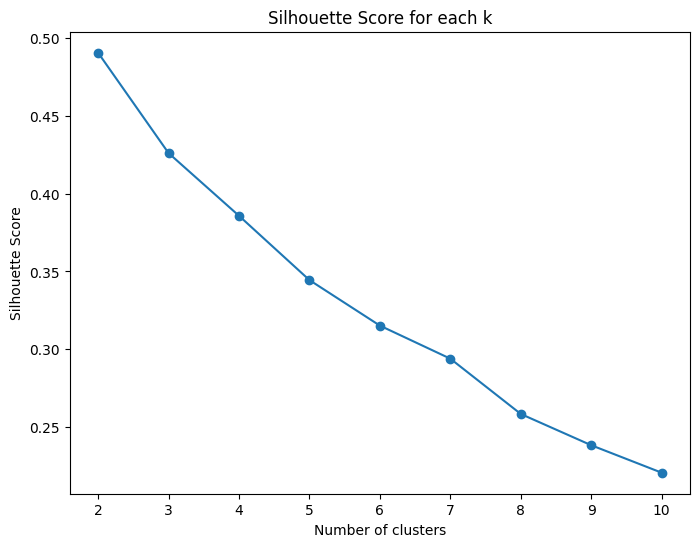

The optimal number of clusters is 2


In [55]:
iters, s_scores = find_optimal_clusters(data.drop(columns=['cluster'], errors='ignore'), max_k=10)

optimal_k = iters[s_scores.index(max(s_scores))]
print(f'The optimal number of clusters is {optimal_k}')

In [56]:
K = 4# Use CV for finding the optmial number. Here i brute forced it.

# data = data.drop('cluster', axis=1)
def get_clusters(df):
    df['cluster'] = KMeans(n_clusters=K,
                           random_state=0,
                           init='random').fit(df).labels_
    return df

In [57]:
data = data.dropna().groupby('date', group_keys=False).apply(get_clusters)

In [58]:
data

garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                              
2017-10-31 AAL            -0.000363  41.051789  3.849110  3.921750  3.994389   
           AAPL           -0.000998  69.196824  3.596048  3.642923  3.689797   
           ABBV           -0.034008  55.247890  4.196702  4.243063  4.289423   
           ABT            -0.005190  53.844909  3.892568  3.916137  3.939707   
           ACN            -0.003925  69.365079  4.802675  4.842354  4.882034   
...                             ...        ...       ...       ...       ...   
2023-09-30 WFC            -0.000110  40.920282  3.697055  3.737418  3.777782   
           WMT            -0.000041  54.722521  3.984976  4.002446  4.019915   
           XOM            -0.000065  59.440180  4.687091  4.727187  4.767283   
           MRNA            0.000146  38.747314  4.582514  4.685332  4.788149   
           UBER            0.000441  45.005268  3.806654  3.862227  3.917801   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2017-10-31 AAL     1.011062 -0.018697  -0.014108   0.022981  -0.023860   
           AAPL   -0.906642 -0.039275   0.096808   0.015250   0.044955   
           ABBV    0.375557  0.473814   0.022728   0.098590   0.091379   
           ABT    -1.040044  0.276133   0.021276   0.034308   0.034801   
           ACN    -0.986514  0.352342   0.064180   0.048454   0.037203   
...                     ...       ...        ...        ...        ...   
2023-09-30 WFC    -0.558742 -0.282325  -0.015500  -0.057917  -0.013554   
           WMT    -0.196381  0.399459  -0.000676   0.010014   0.012354   
           XOM     0.601335  1.400623   0.046947   0.046139   0.030496   
           MRNA   -0.529511 -0.376899  -0.132219  -0.086803  -0.068763   
           UBER   -0.746098 -0.133973  -0.062672  -0.053920   0.008422   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2017-10-31 AAL      0.016495   0.007008    0.012702  1.265330  1.314924   
           AAPL     0.028875   0.038941    0.035228  1.276025 -0.271593   
           ABBV     0.056495   0.047273    0.044026  0.494533  0.362678   
           ABT      0.038672   0.031320    0.029294  0.828390 -0.199397   
           ACN      0.028692   0.027398    0.018728  1.199021 -0.166371   
...                      ...        ...         ...       ...       ...   
2023-09-30 WFC      0.016712   0.000702    0.003255  1.136804  0.311859   
           WMT      0.017574   0.016553    0.020256  0.740244 -0.259780   
           XOM      0.012838   0.008747    0.027037  1.005607 -1.051740   
           MRNA    -0.071952  -0.064976   -0.015431  1.154879  0.766422   
           UBER     0.057244   0.066838    0.043691  1.078514  1.163168   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2017-10-31 AAL     0.600746  0.459424  0.563337        2  
           AAPL   -0.591212  0.647543  0.458383        3  
           ABBV   -0.032805  0.242182  0.164052        1  
           ABT    -0.529385  0.251774  0.970502        1  
           ACN    -0.328322  0.268152  0.168634        3  
...                     ...       ...       ...      ...  
2023-09-30 WFC     2.009514 -0.406324 -1.469897        1  
           WMT    -0.522483 -0.125198  0.642485        3  
           XOM     1.707637 -0.674966 -0.284575        3  
           MRNA   -1.163095  0.593370  0.989911        1  
           UBER   -0.257055 -1.482917 -0.449948        2  

[10108 rows x 19 columns]

In [59]:
def plot_clusters_indv(data):
    cluster_0 = data[data['cluster'] == 0]
    cluster_1 = data[data['cluster'] == 1]
    cluster_2 = data[data['cluster'] == 2]
    cluster_3 = data[data['cluster'] == 3]

    plt.scatter(cluster_0['atr'], cluster_0['rsi'], color='red', label='cluster 0')
    plt.scatter(cluster_1['atr'], cluster_1['rsi'], color='green', label='cluster 1')
    plt.scatter(cluster_2['atr'], cluster_2['rsi'], color='blue', label='cluster 2')
    plt.scatter(cluster_3['atr'], cluster_3['rsi'], color='black', label='cluster 3')

    plt.xlabel('Garman Klass Vol')
    plt.ylabel('Return 1M')
    plt.legend()
    plt.show()
    return

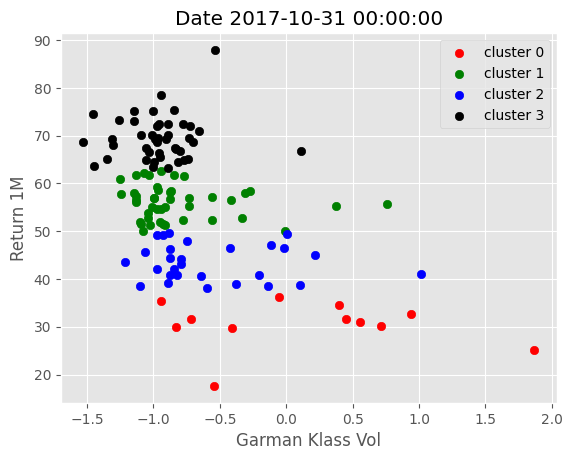

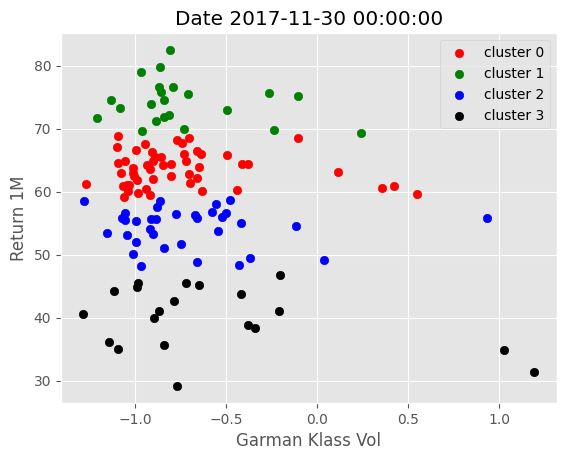

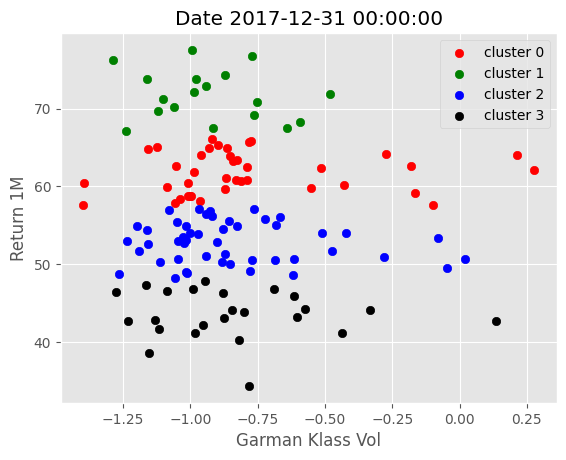

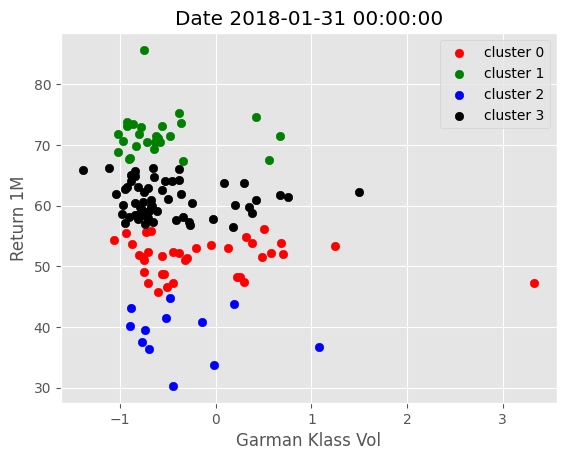

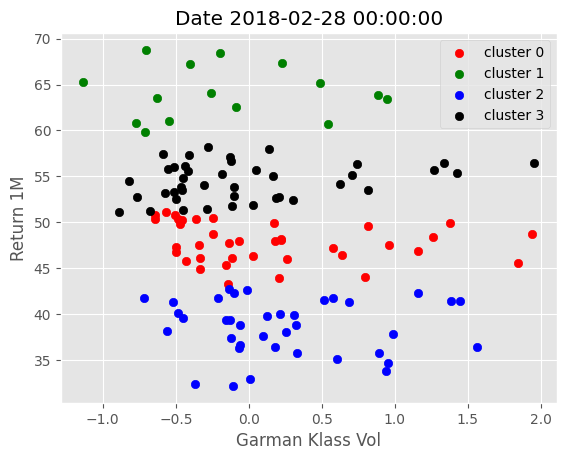

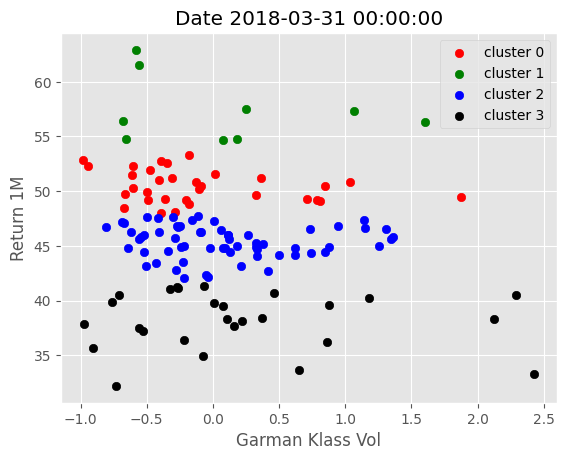

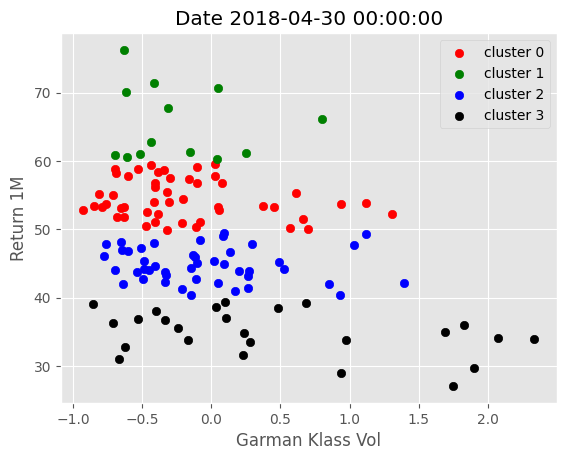

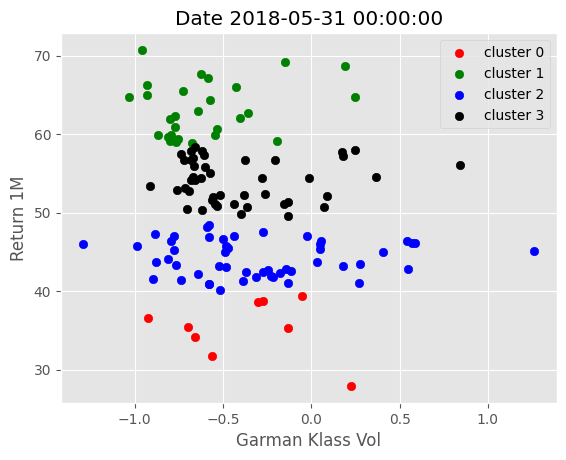

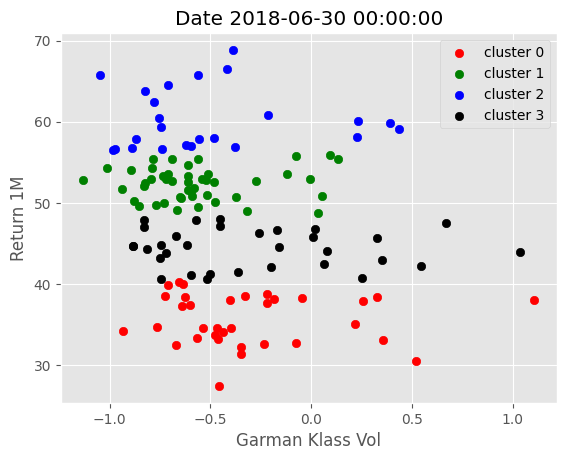

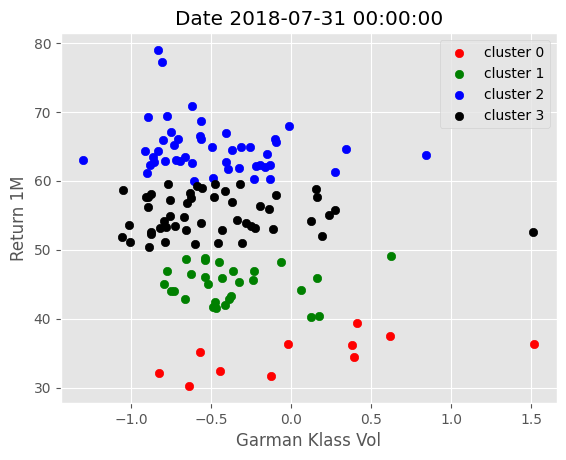

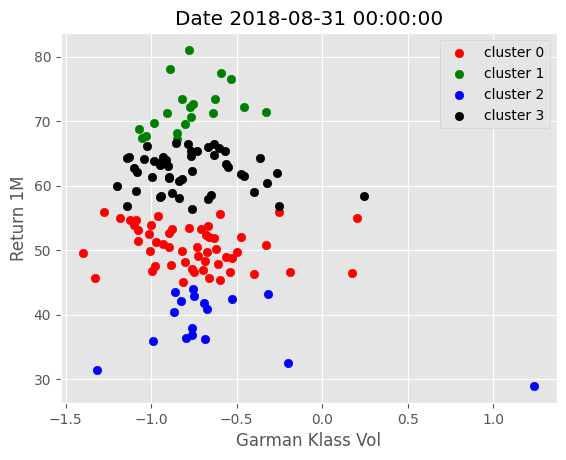

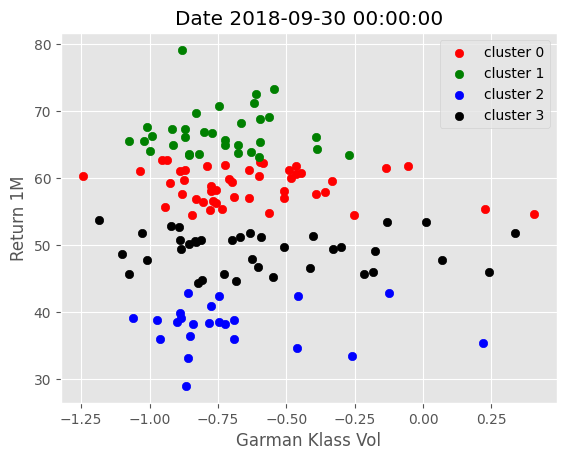

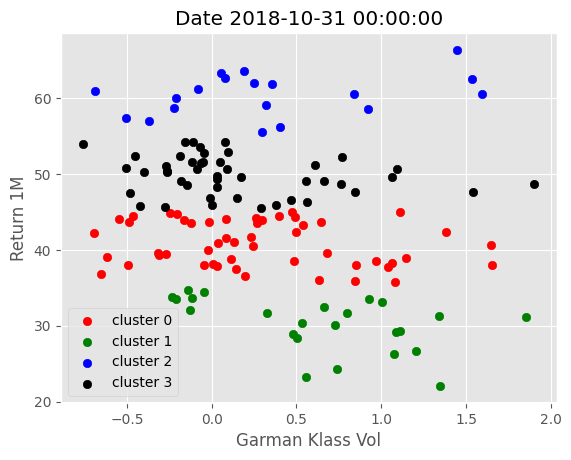

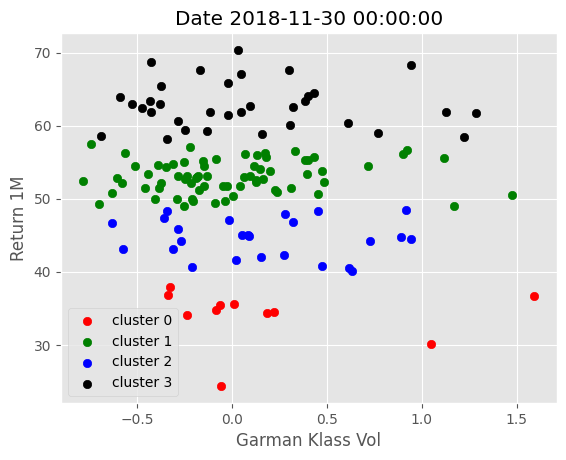

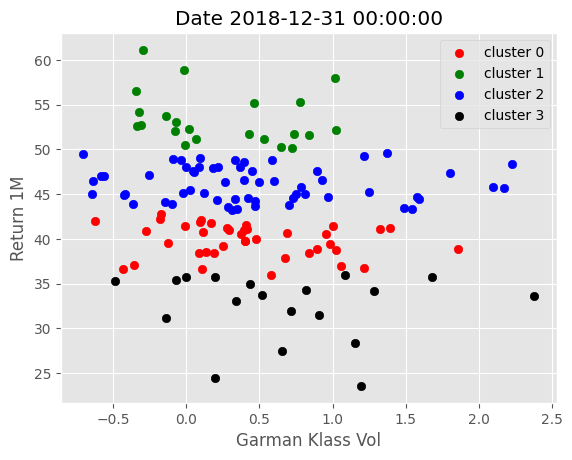

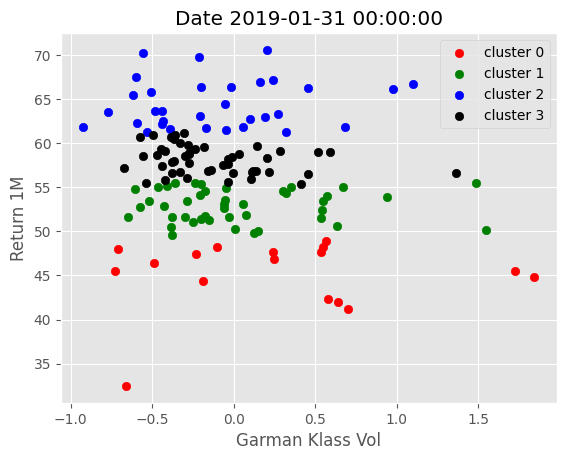

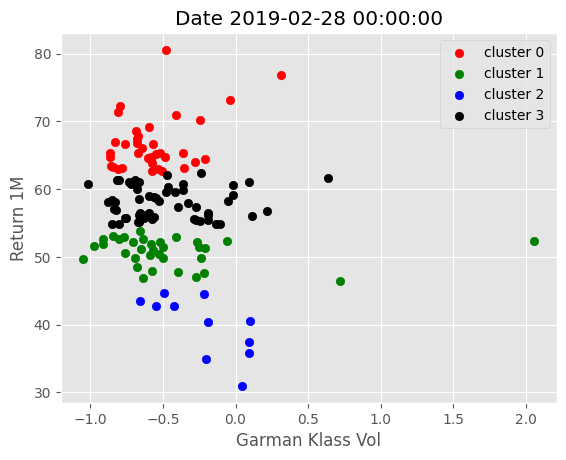

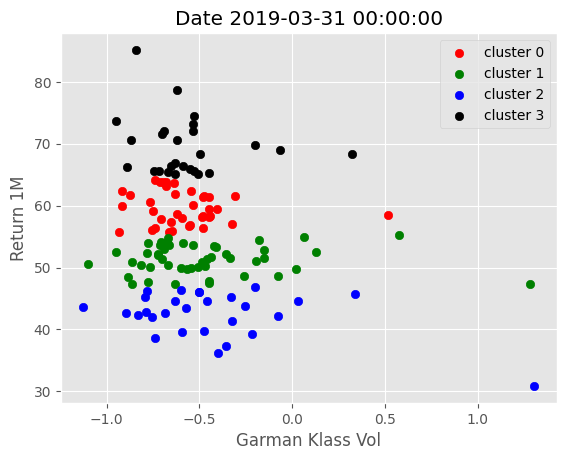

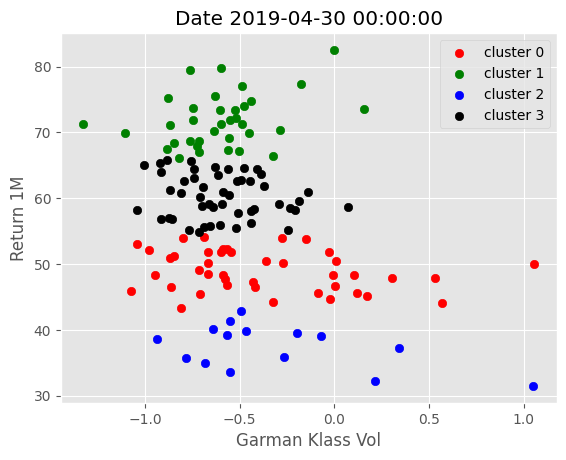

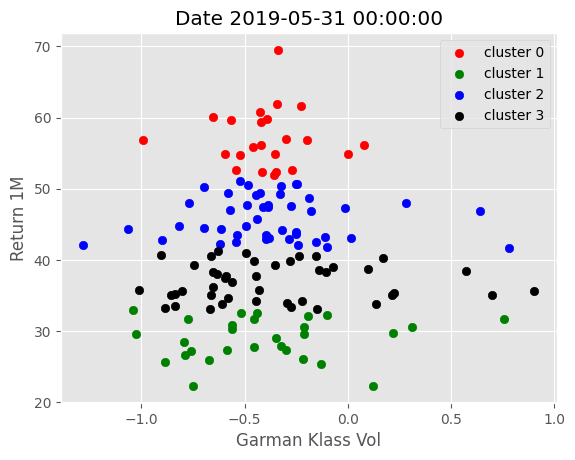

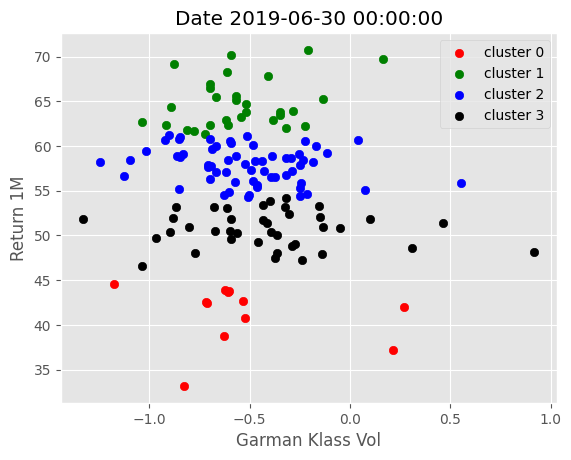

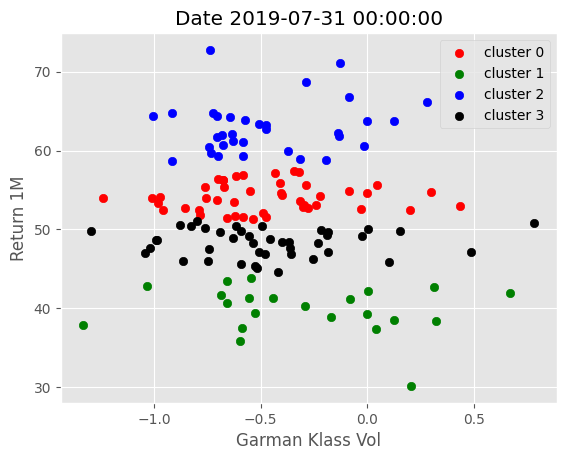

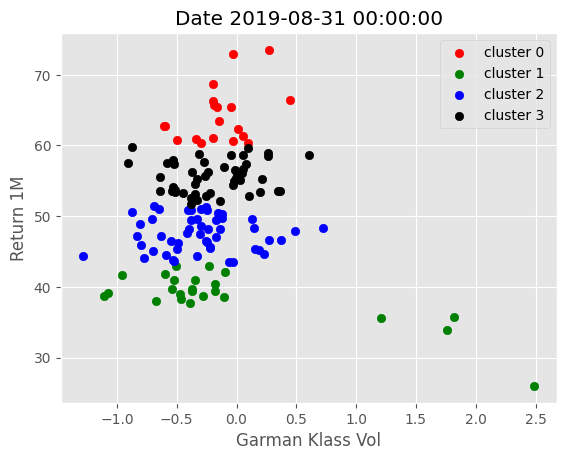

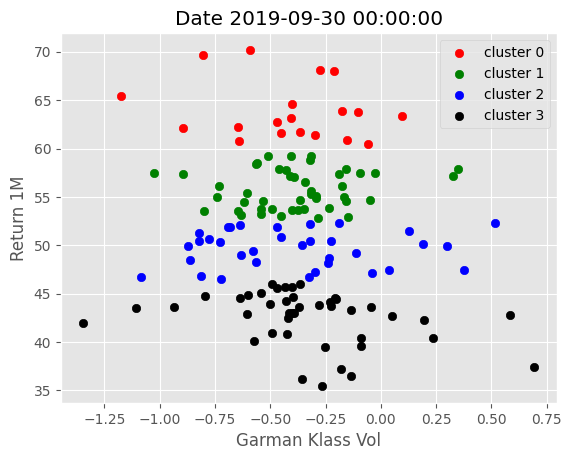

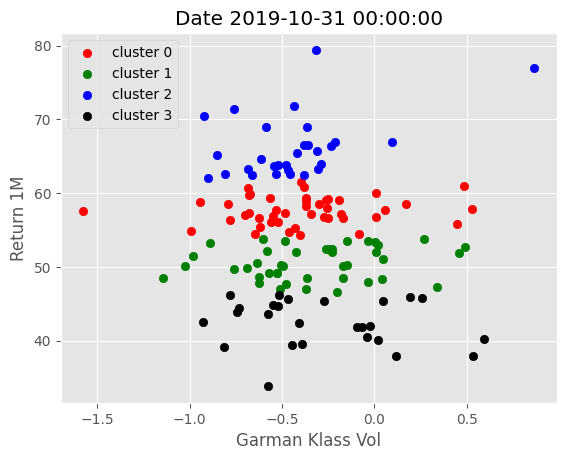

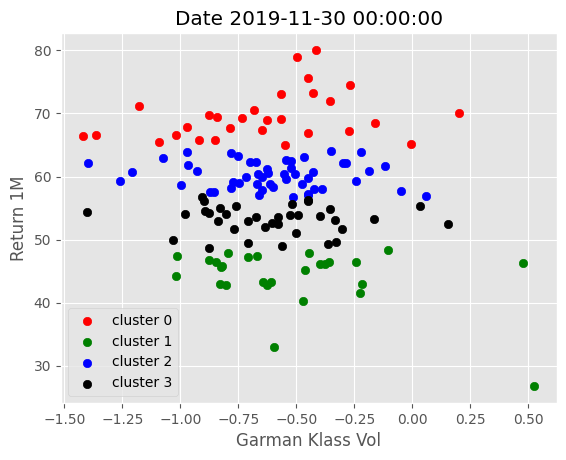

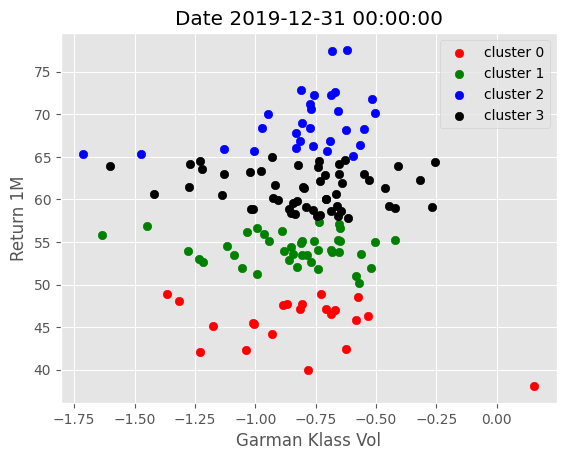

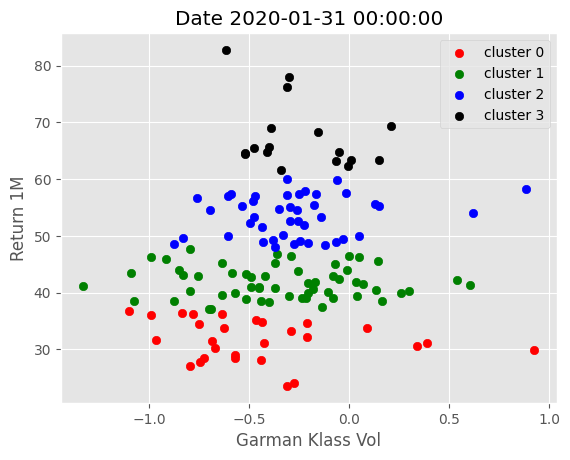

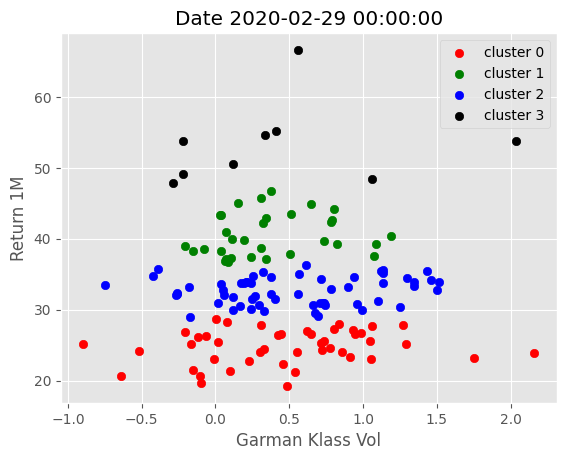

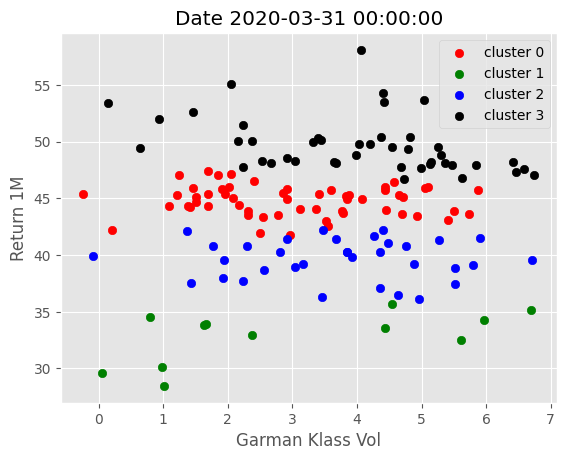

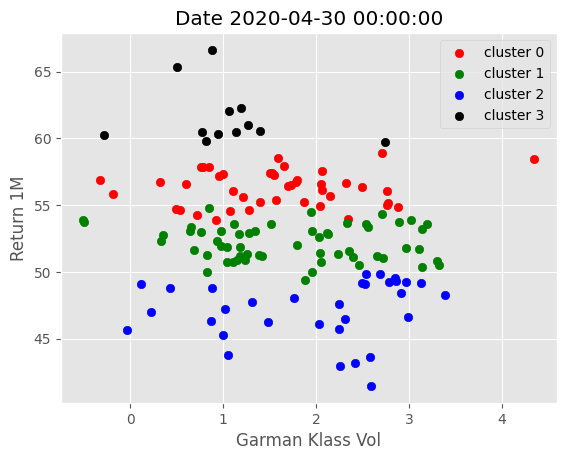

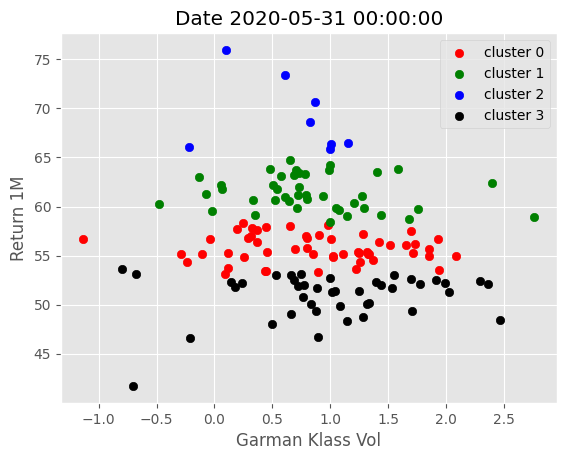

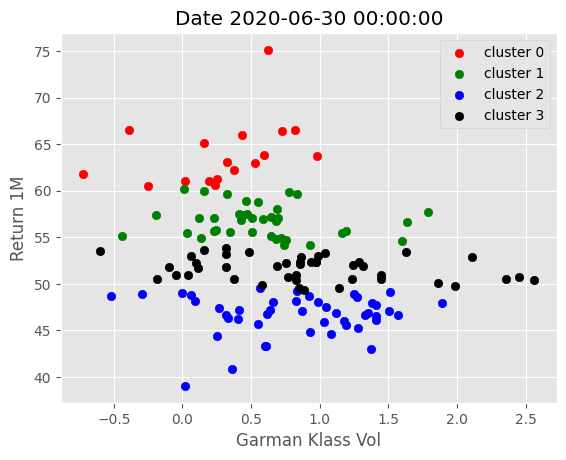

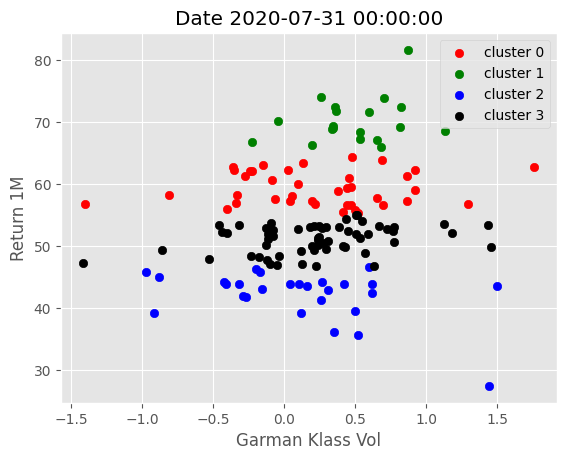

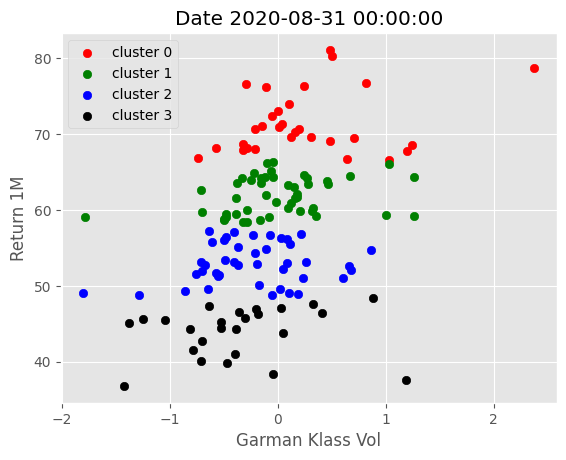

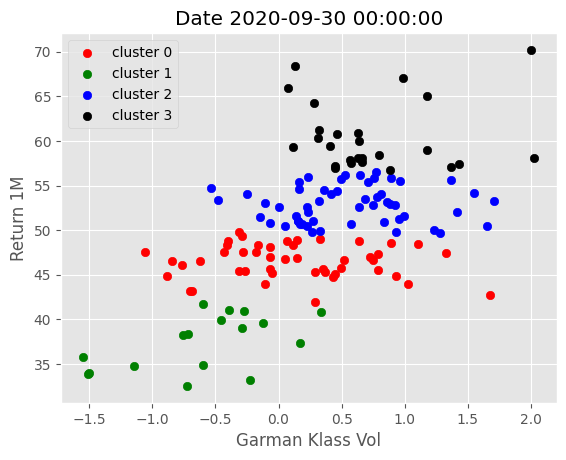

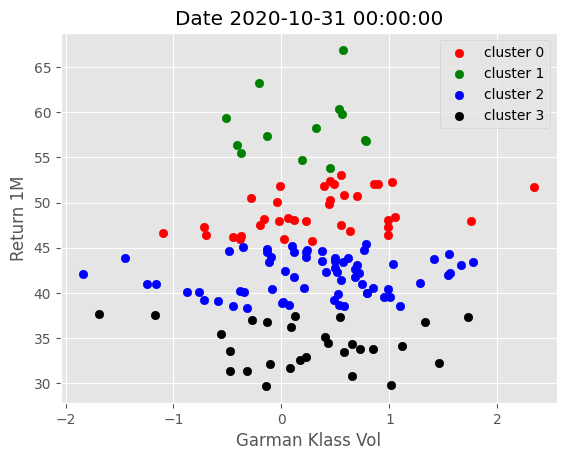

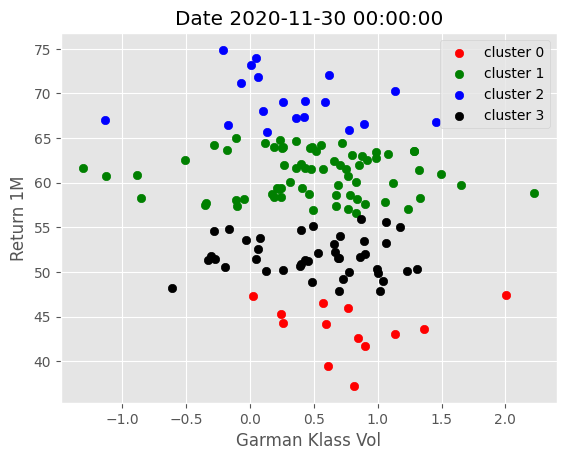

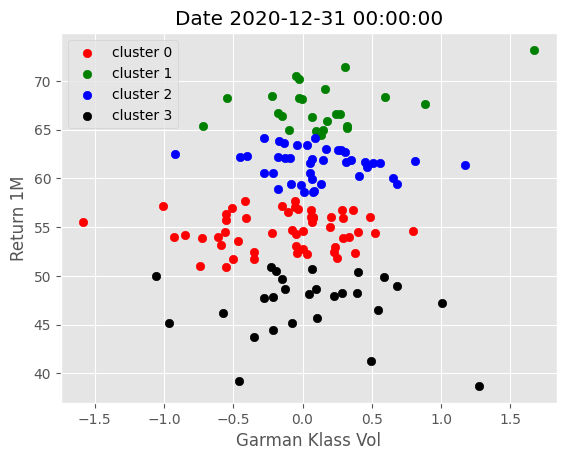

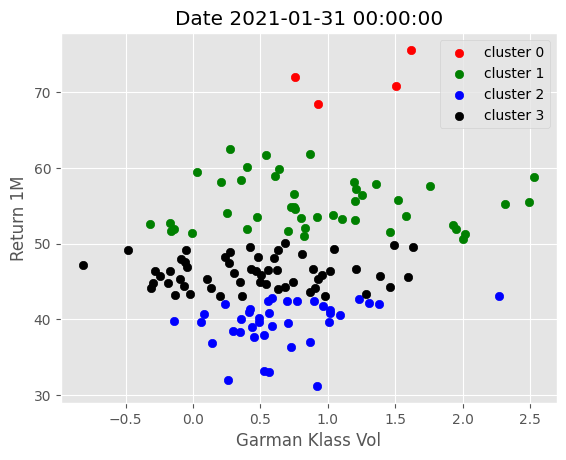

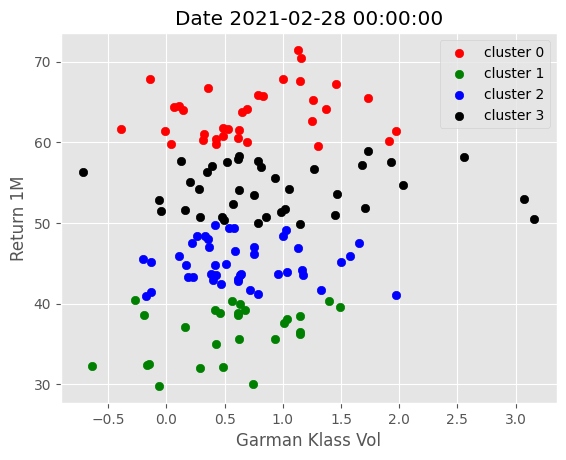

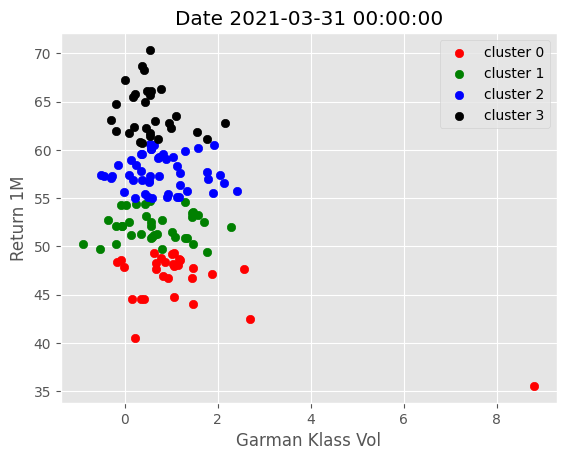

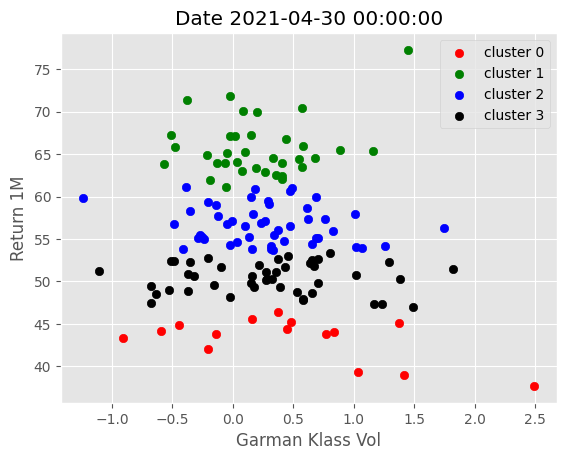

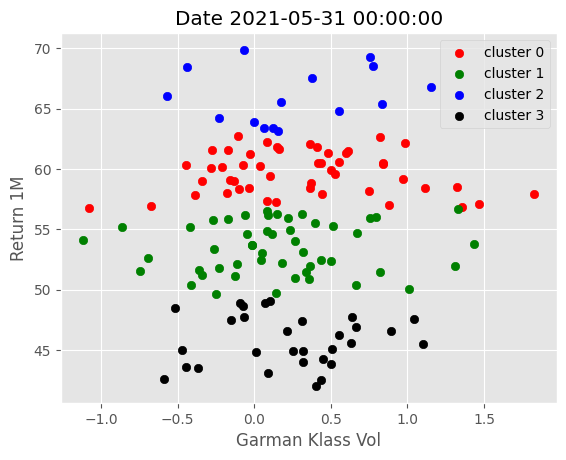

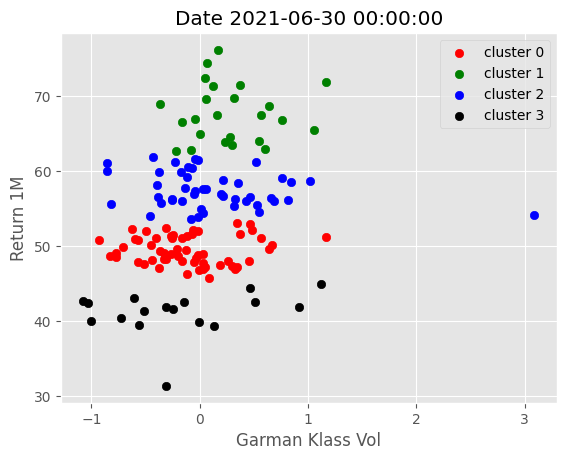

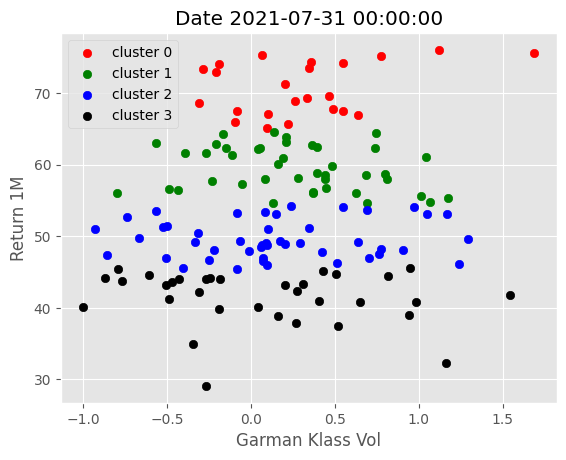

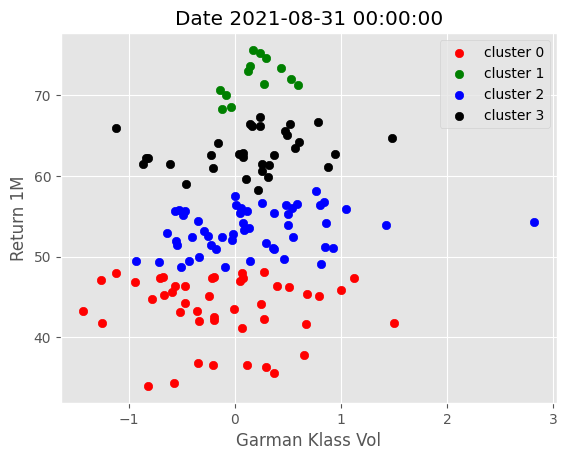

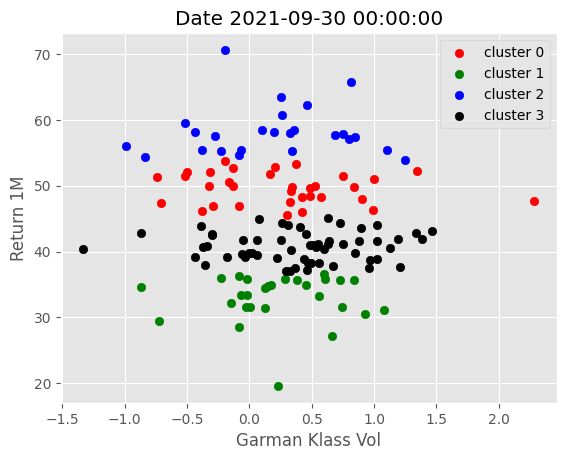

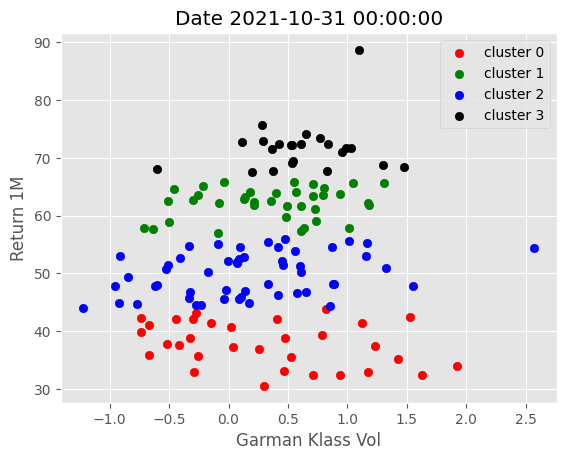

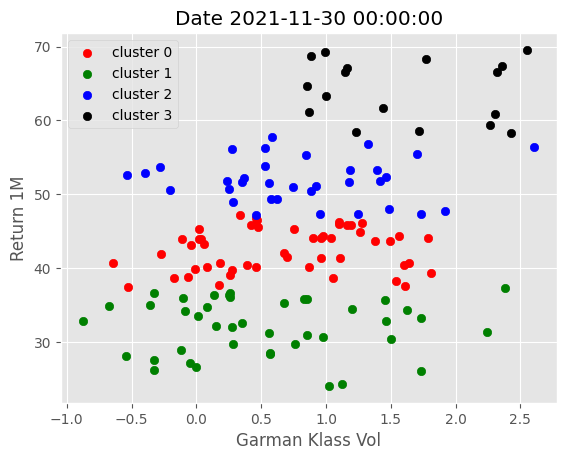

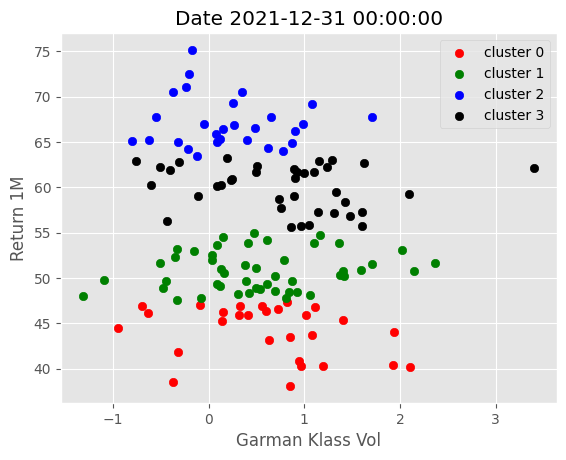

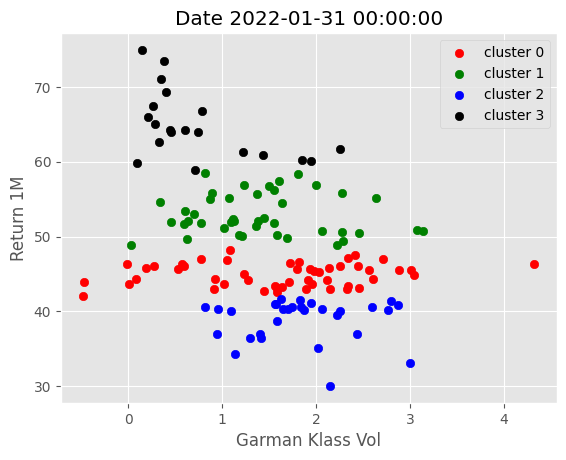

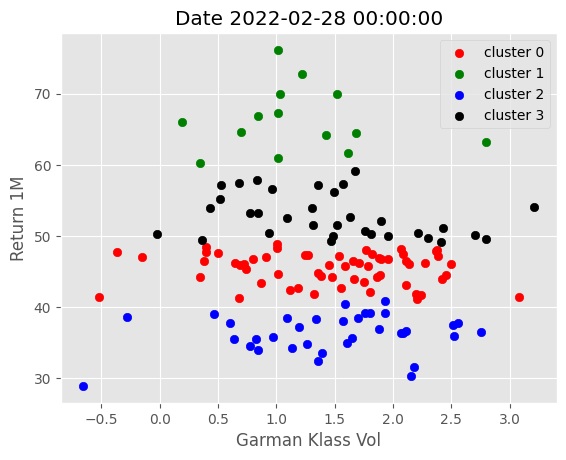

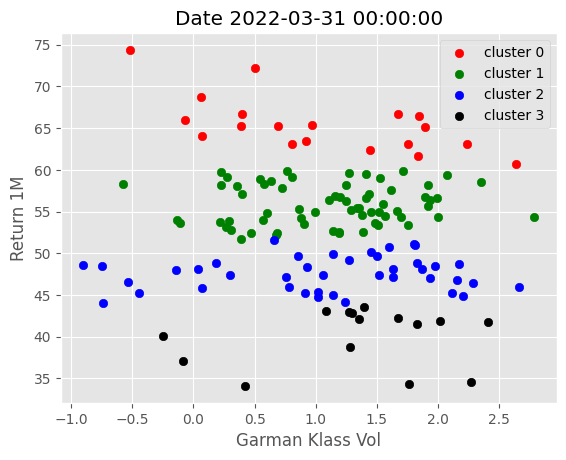

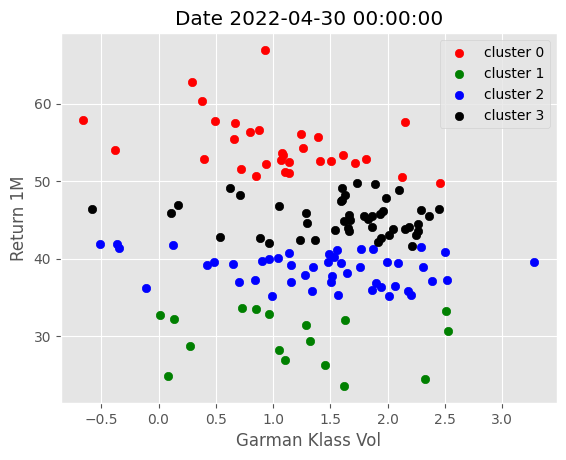

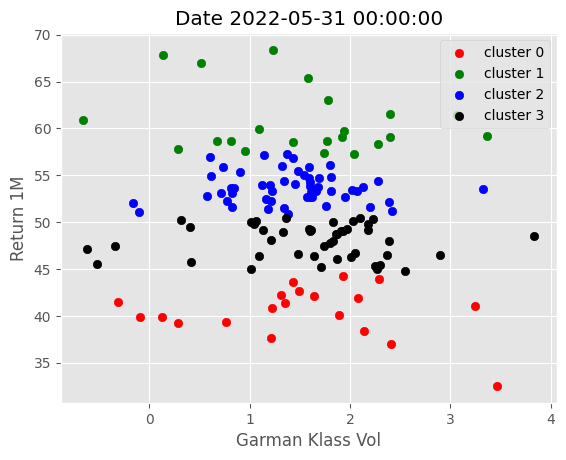

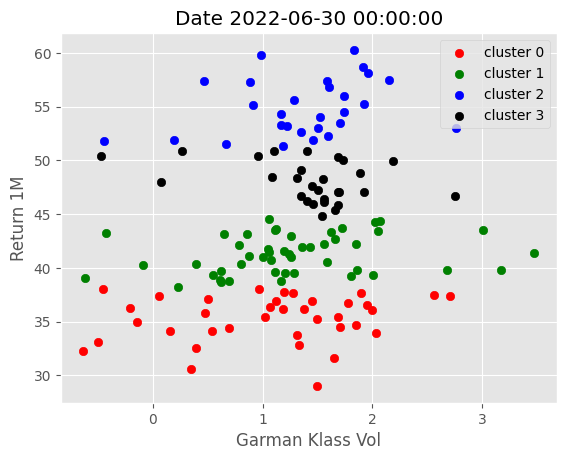

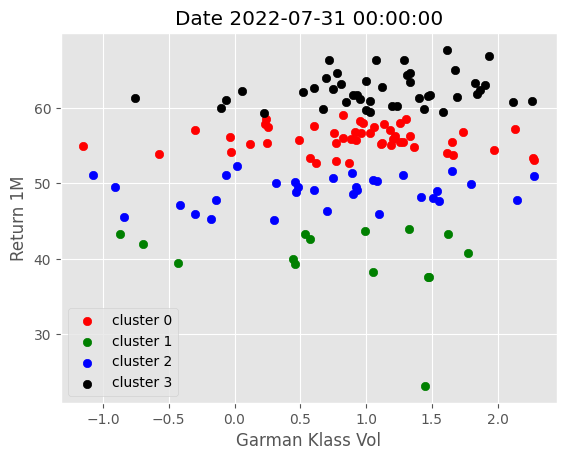

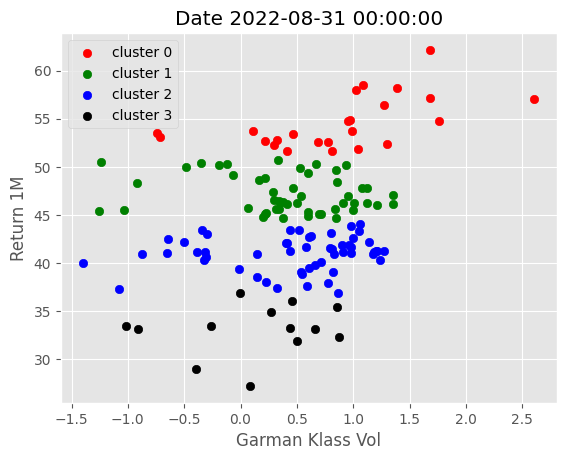

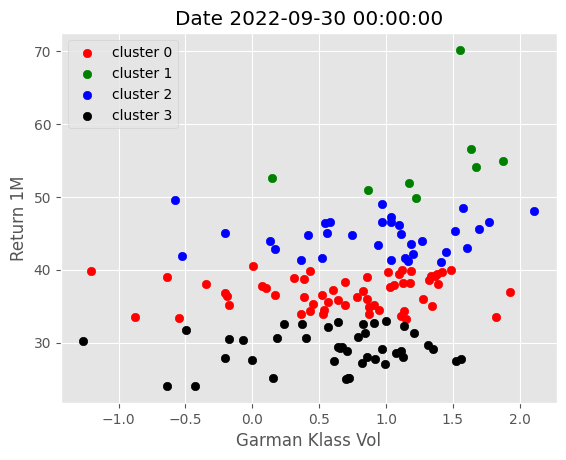

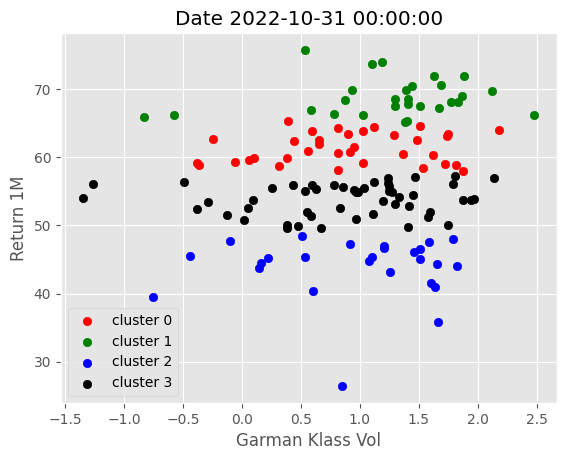

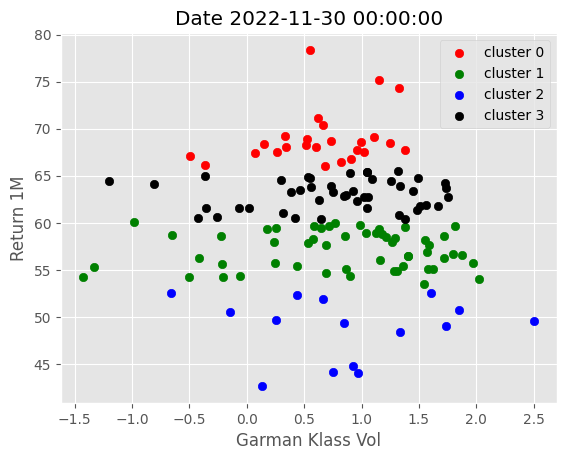

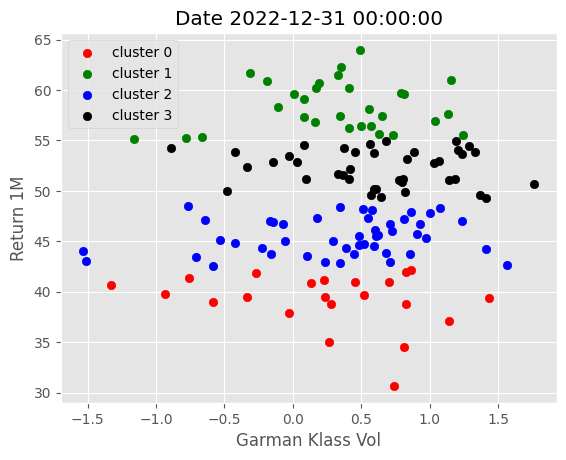

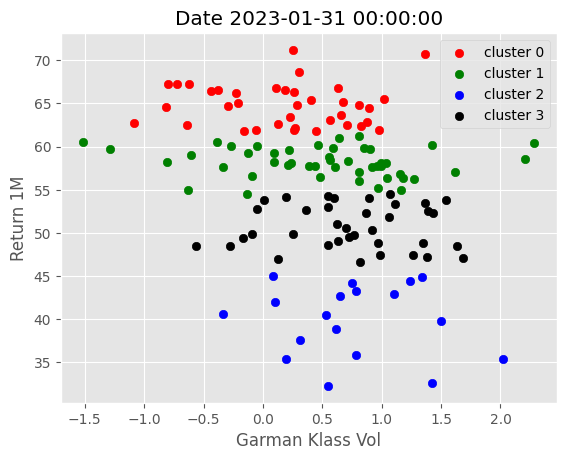

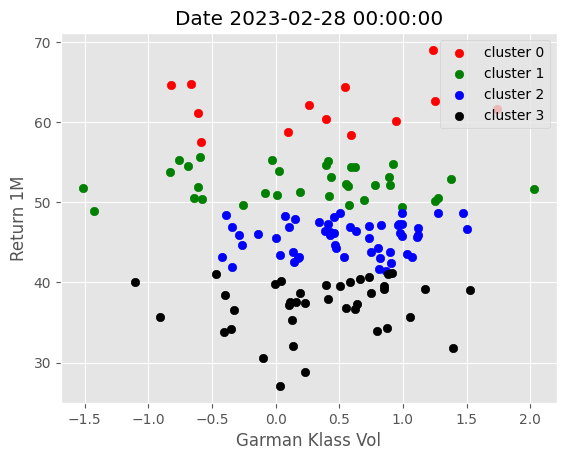

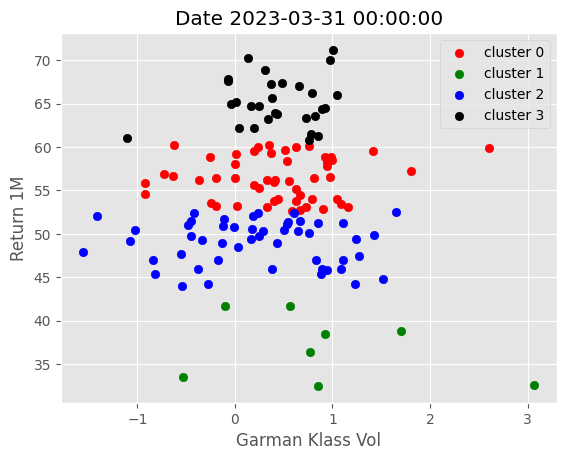

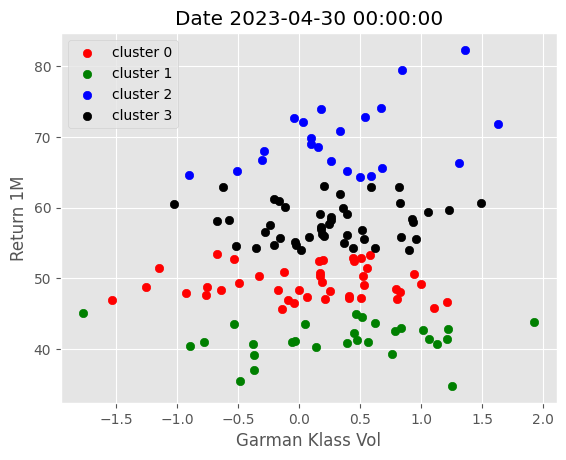

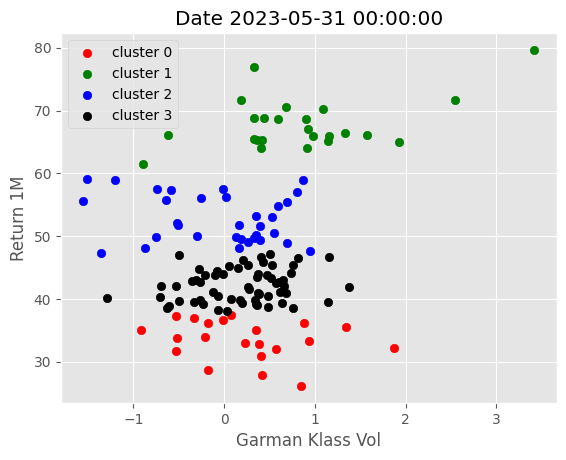

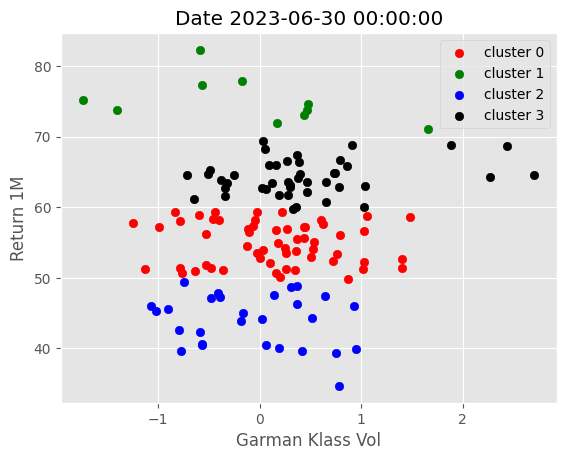

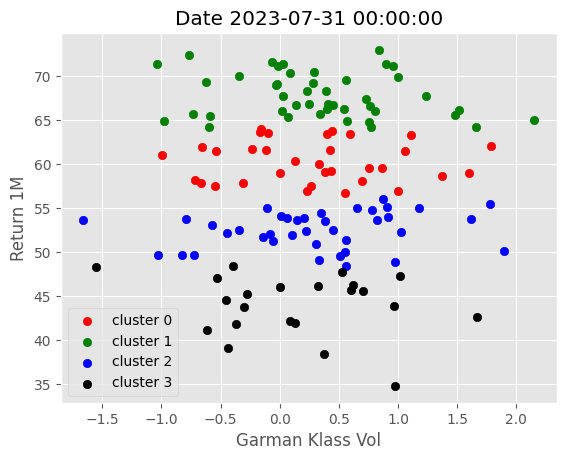

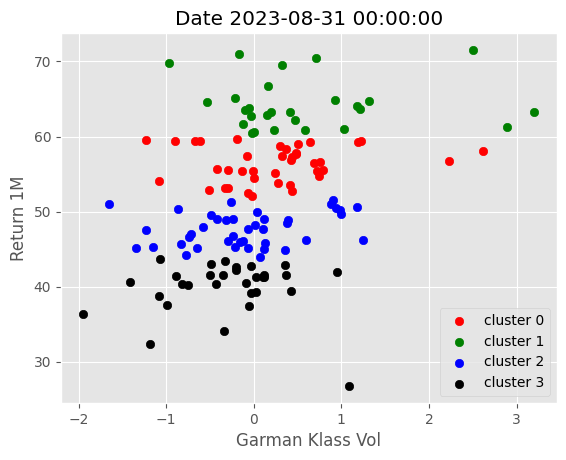

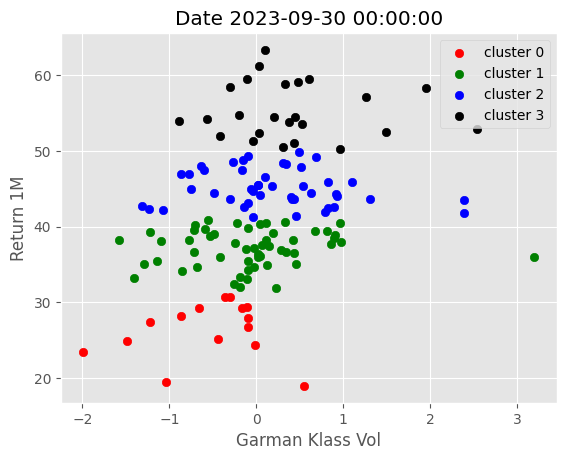

In [60]:
plt.style.use('ggplot')

for i in data.index.get_level_values('date').unique().tolist():
    
    g = data.xs(i, level=0)
    
    plt.title(f'Date {i}')
    
    plot_clusters_indv(g)

In [61]:
def plot_clusters(data1, data2, data3):
    datasets = [data1[0], data2[0], data3[0]]
    titles = [data1[1], data2[1], data3[1]]
    
    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for i, (data, ax, title) in enumerate(zip(datasets, axes, titles)):
        cluster_0 = data[data['cluster'] == 0]
        cluster_1 = data[data['cluster'] == 1]
        cluster_2 = data[data['cluster'] == 2]
        cluster_3 = data[data['cluster'] == 3]

        ax.scatter(cluster_0['atr'], cluster_0['rsi'], color='red', label='cluster 0')
        ax.scatter(cluster_1['atr'], cluster_1['rsi'], color='green', label='cluster 1')
        ax.scatter(cluster_2['atr'], cluster_2['rsi'], color='blue', label='cluster 2')
        ax.scatter(cluster_3['atr'], cluster_3['rsi'], color='black', label='cluster 3')
        
        ax.set_title(f'Date {title}')
        ax.legend()
    
    plt.show()
    return

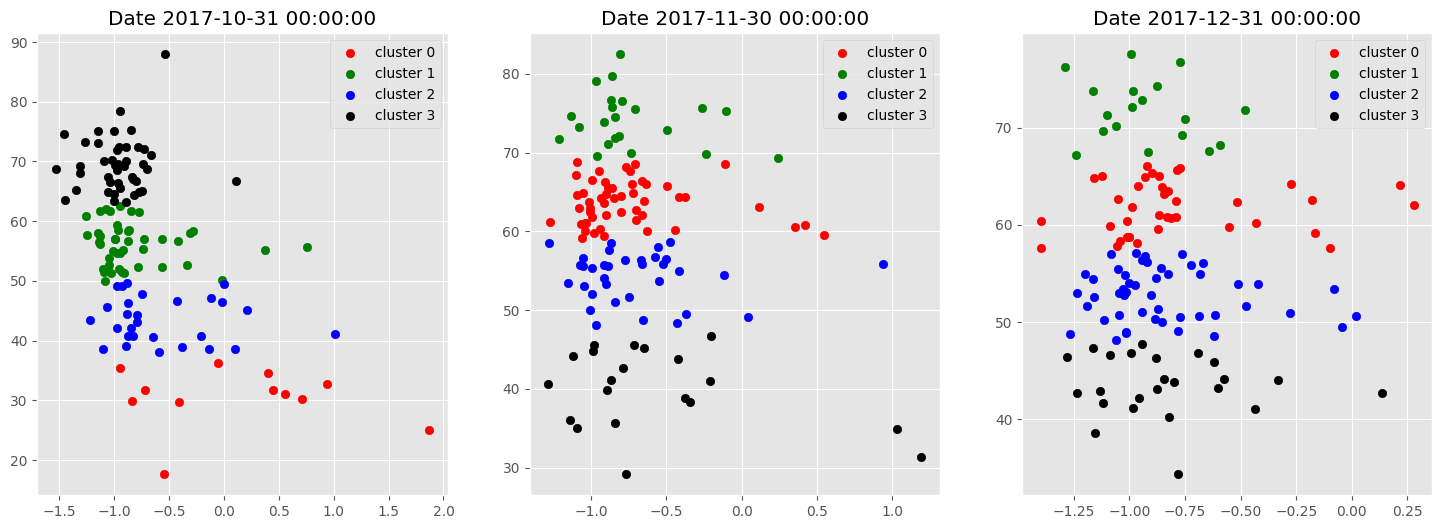

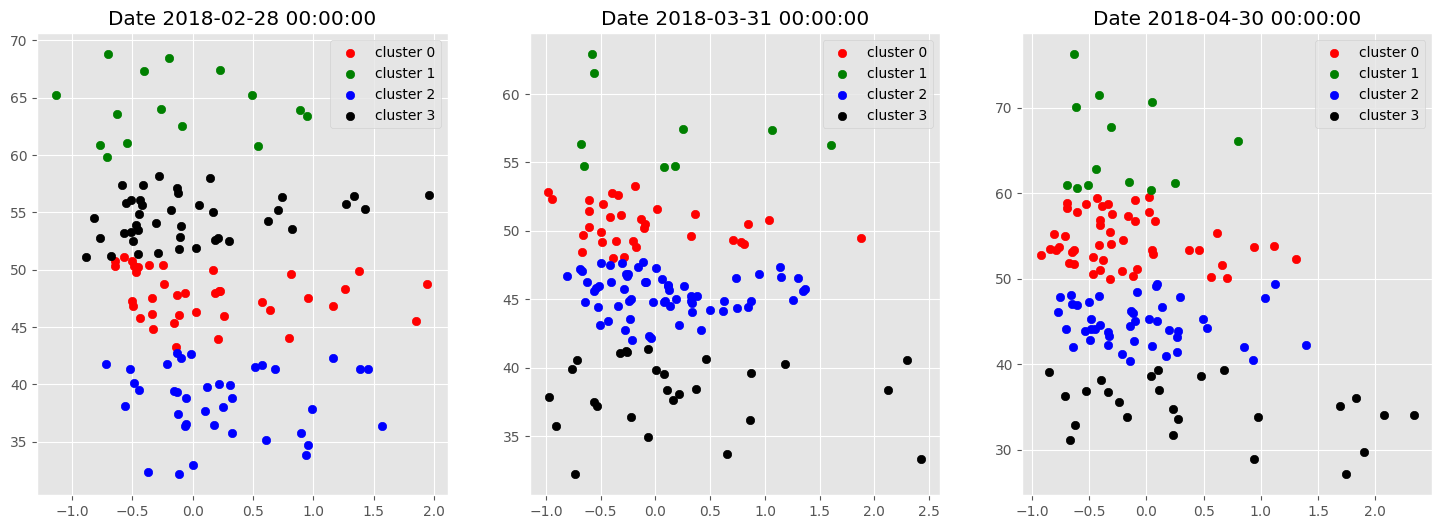

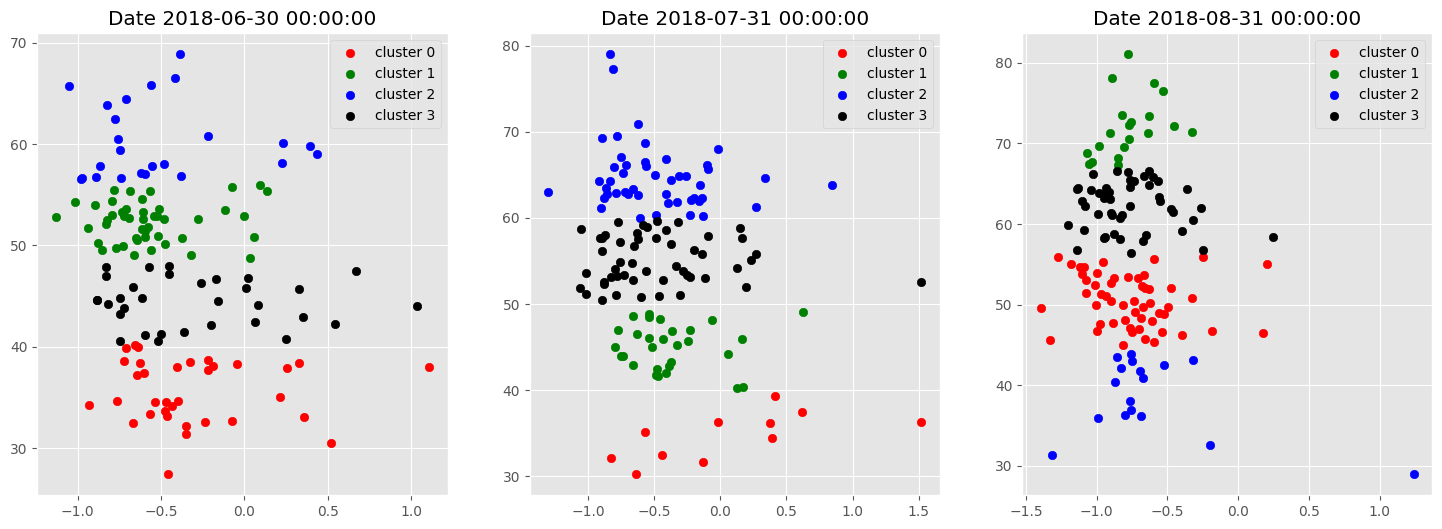

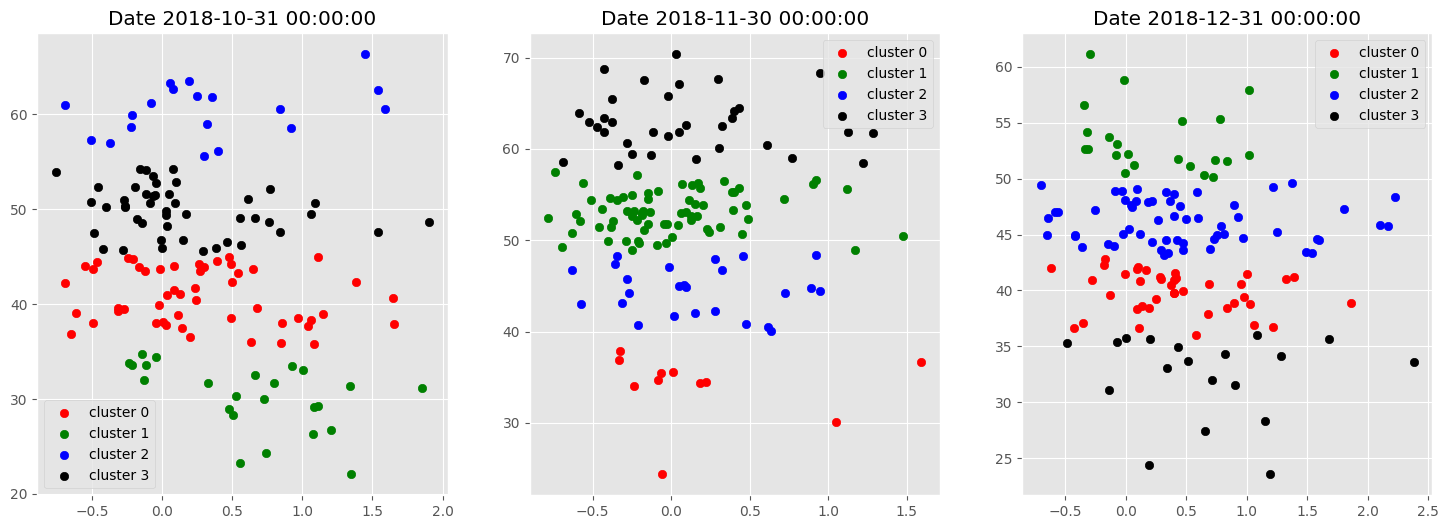

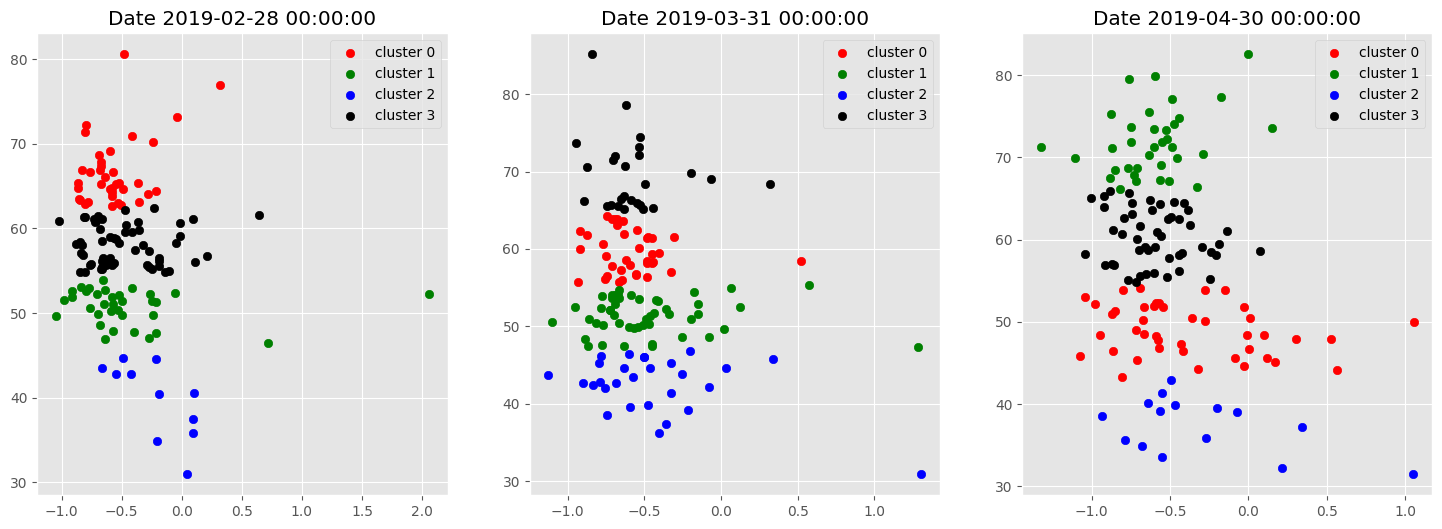

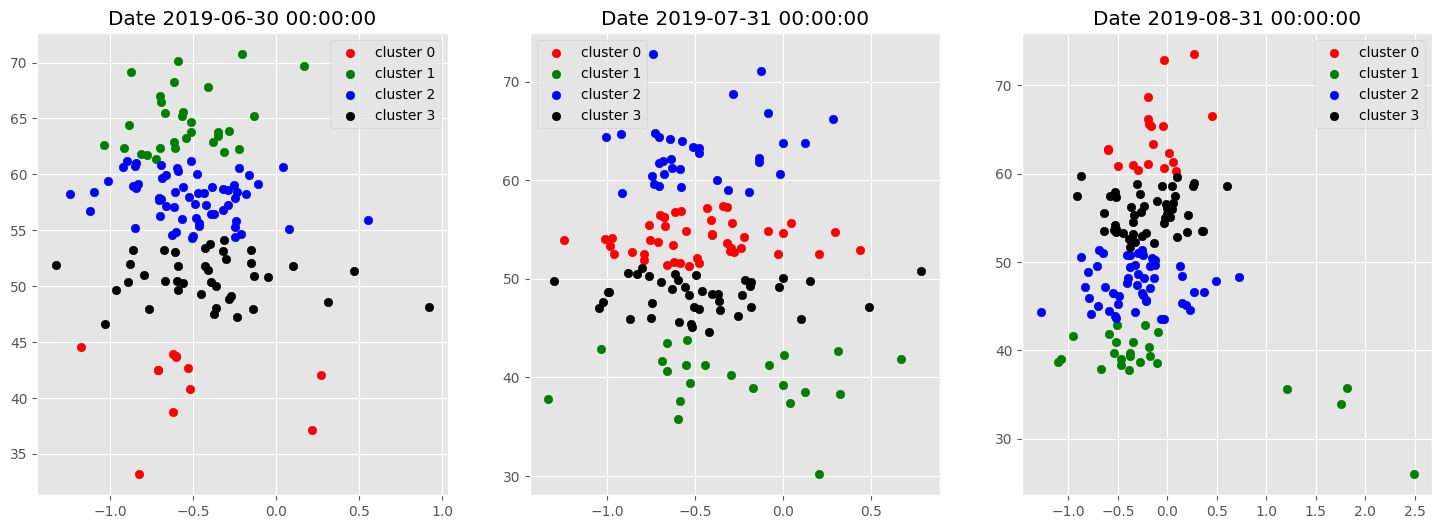

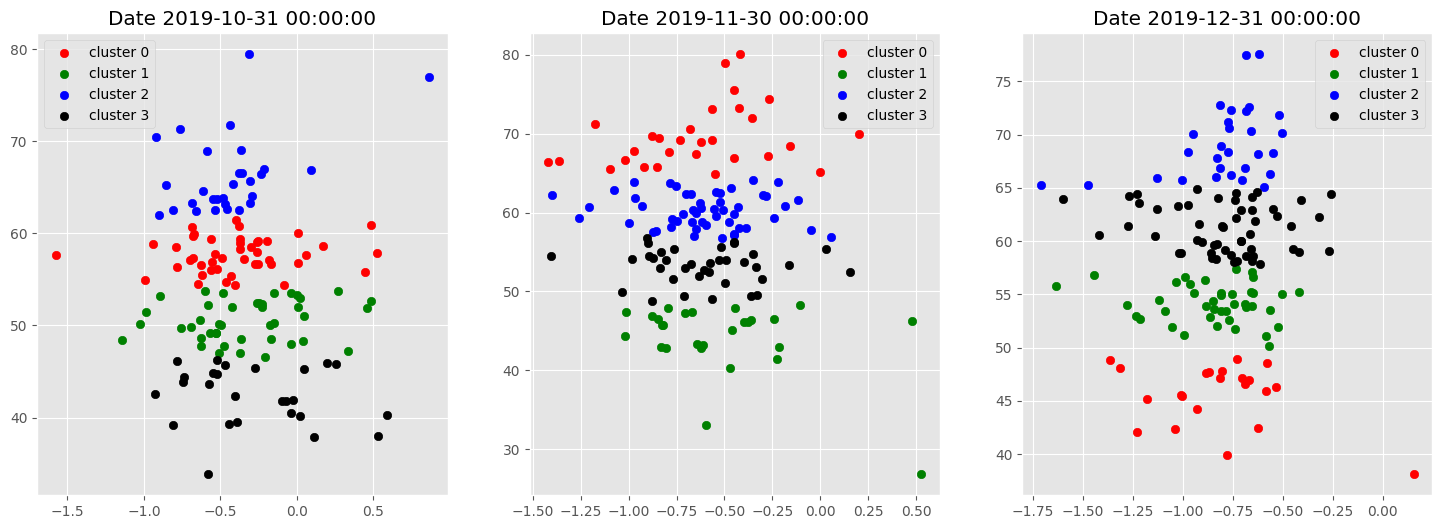

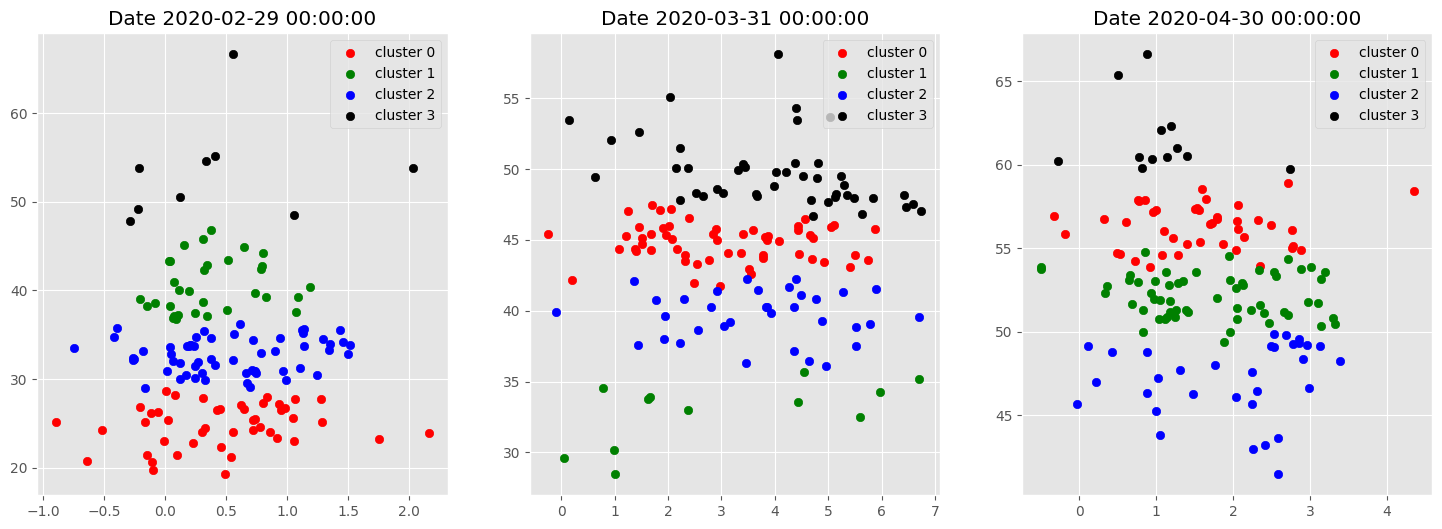

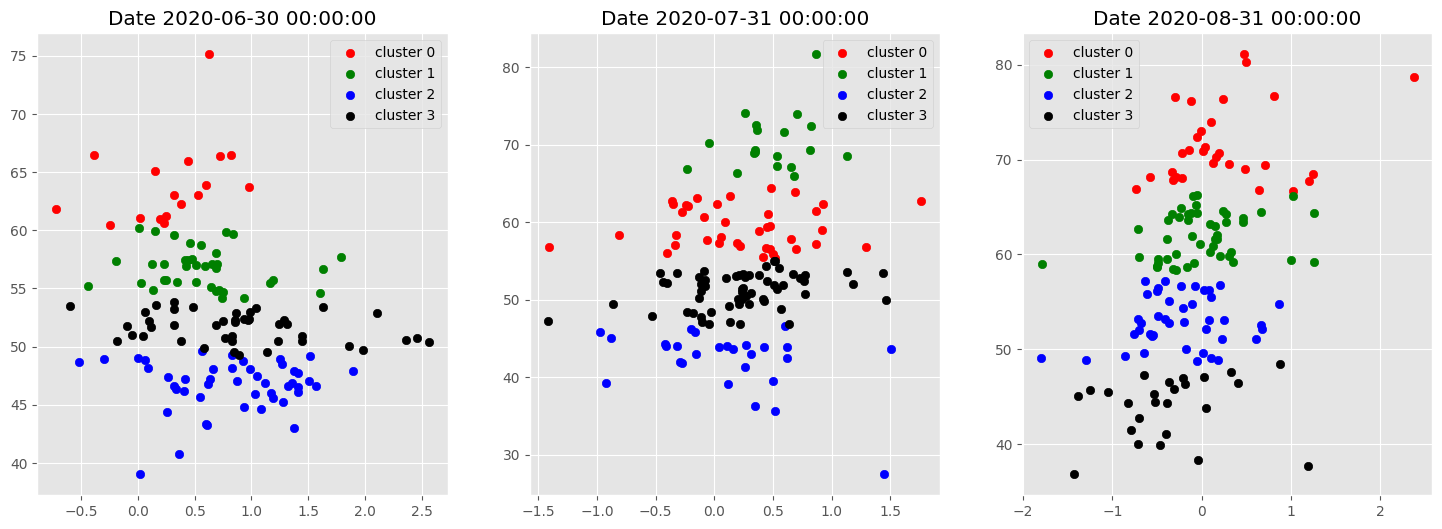

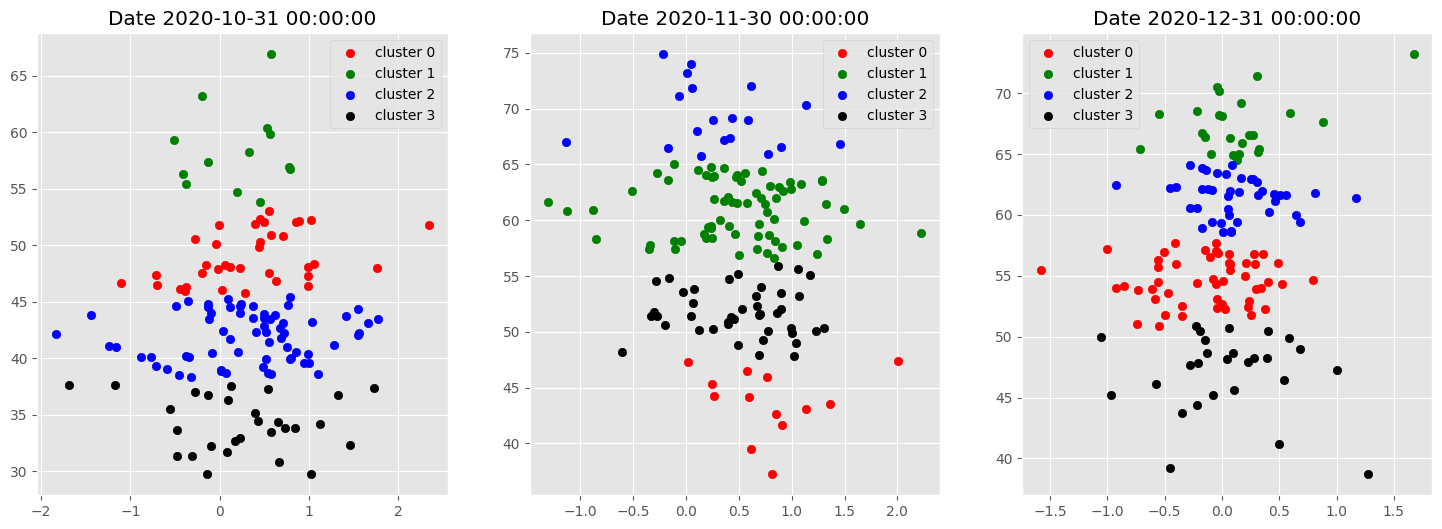

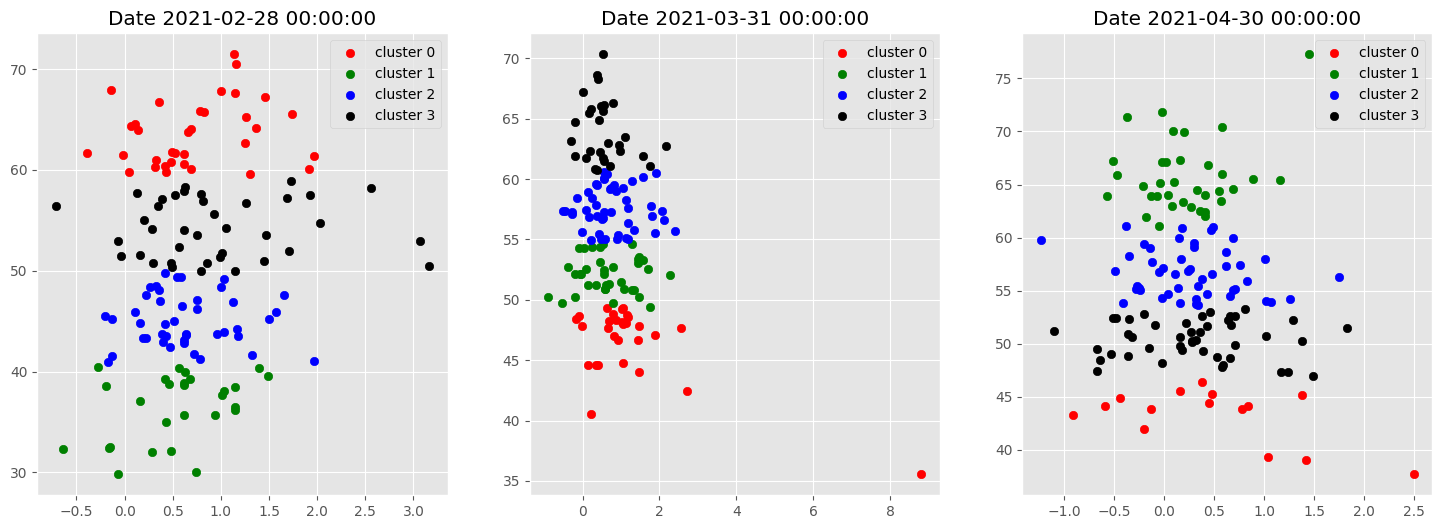

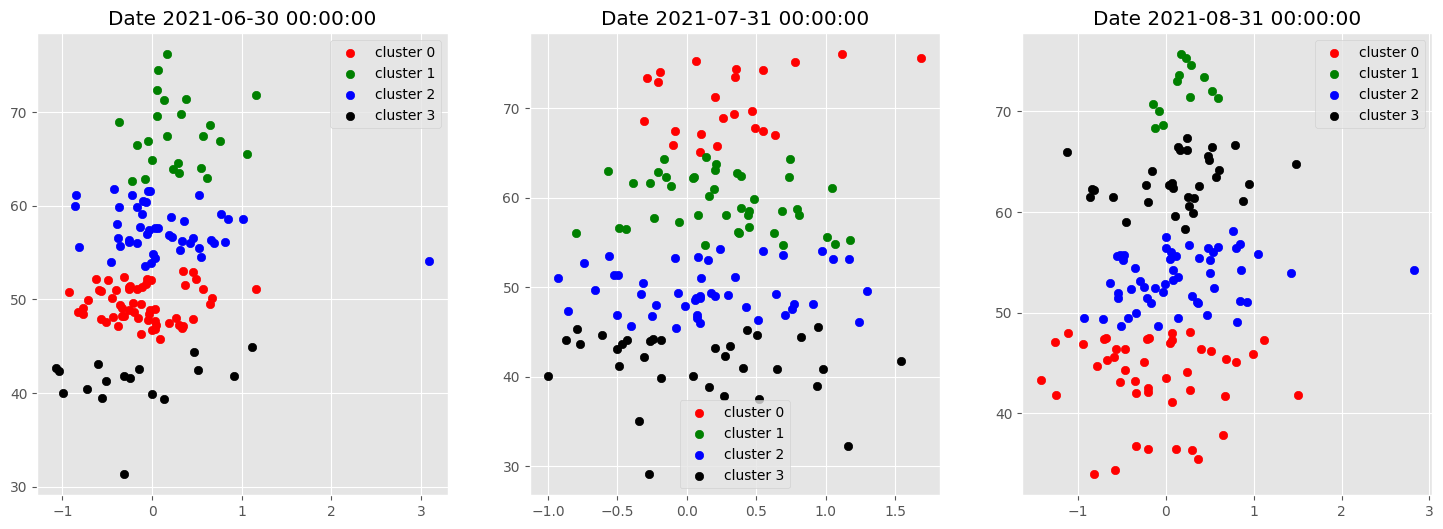

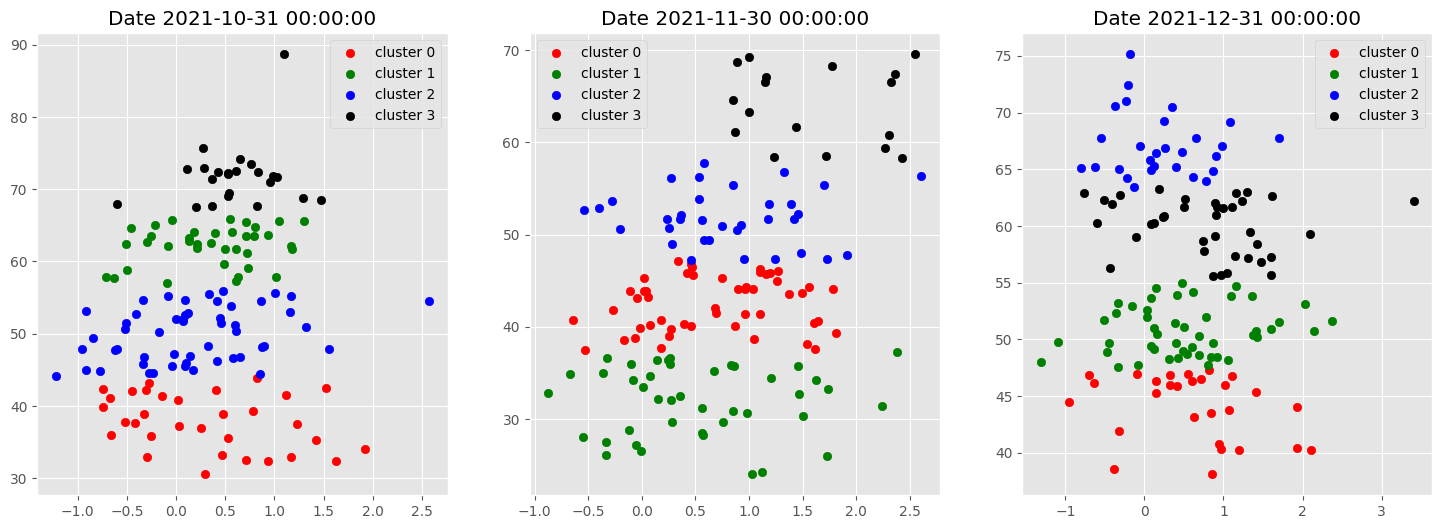

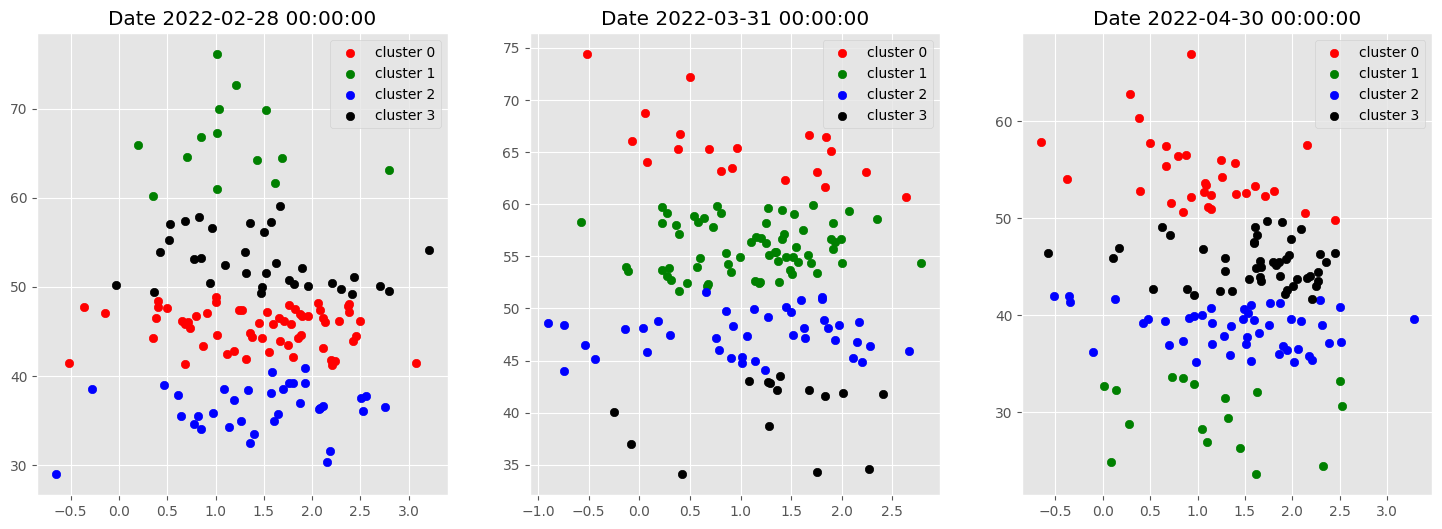

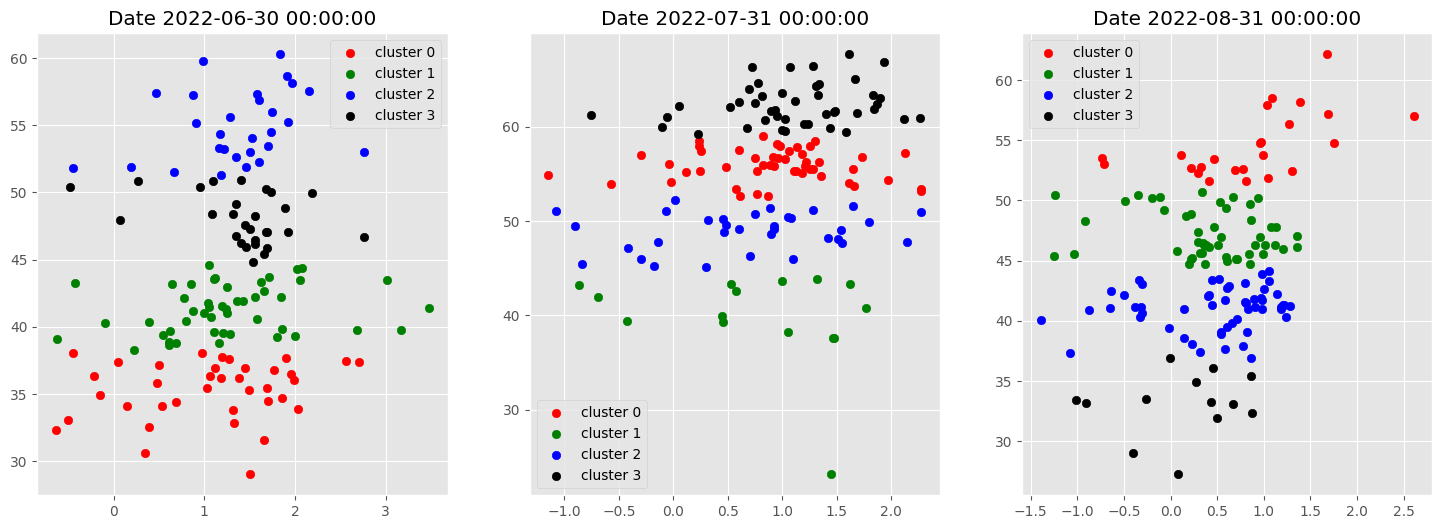

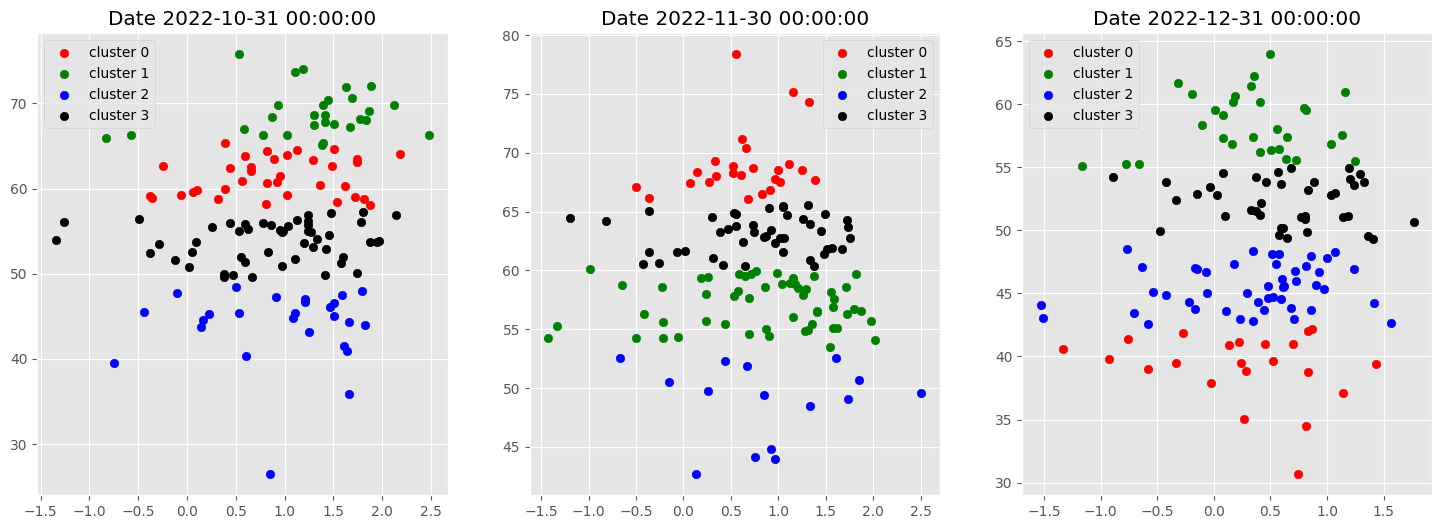

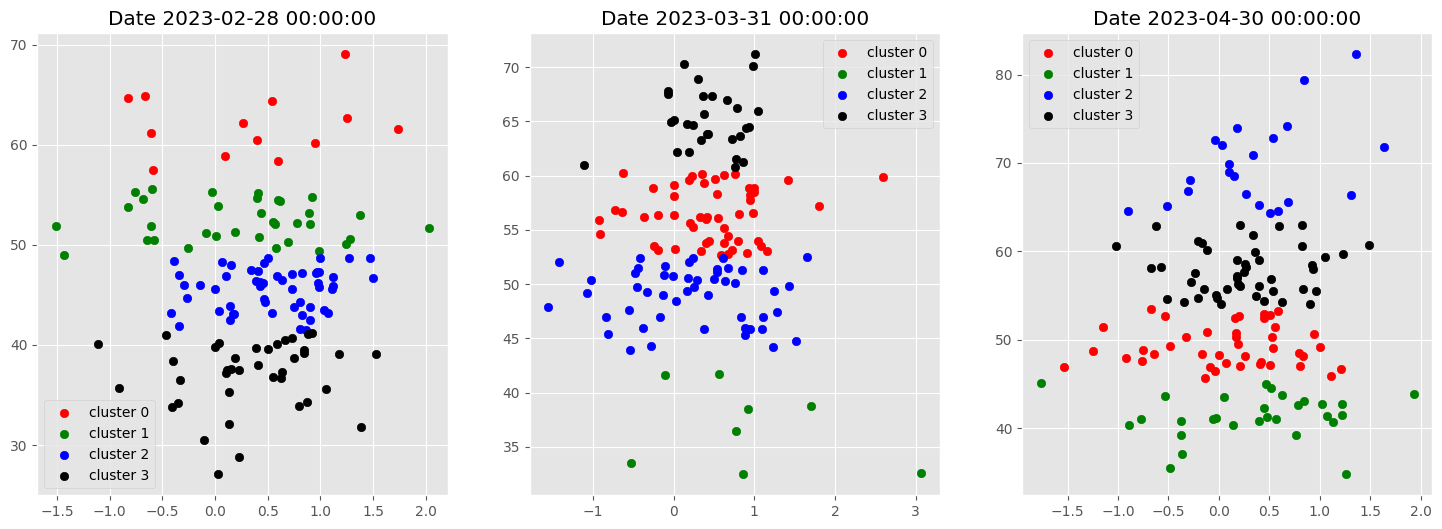

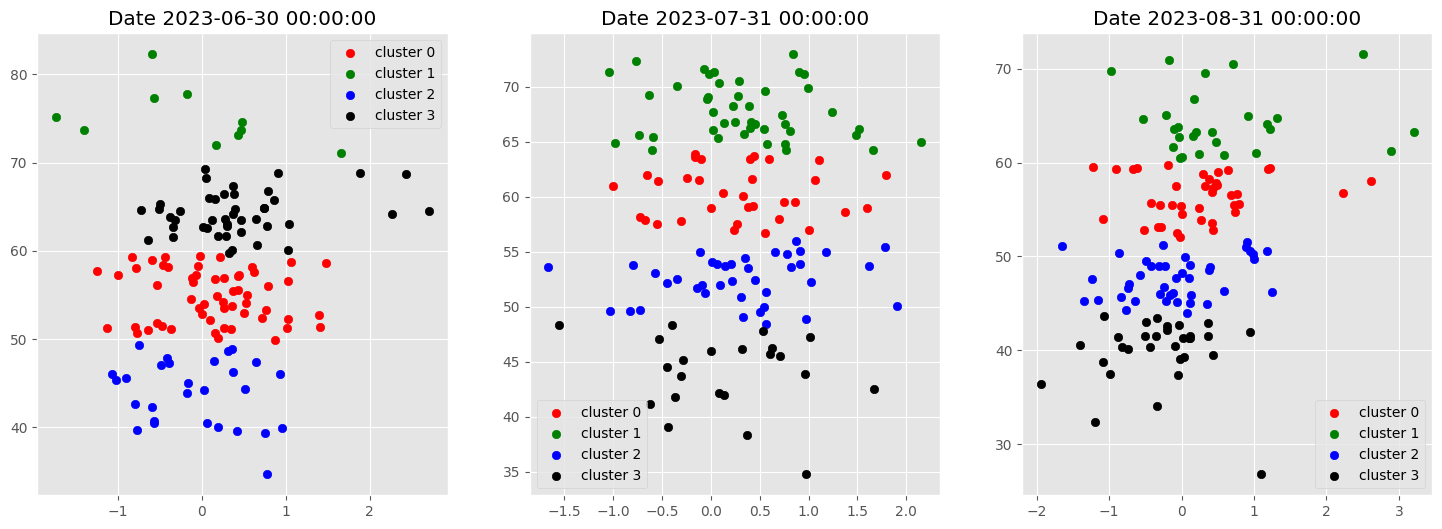

In [62]:
plt.style.use('ggplot')
c=0
temp = []
for i in data.index.get_level_values('date').unique().tolist():
    if c<3:
        temp.append(i)
        c+=1
    else:
        g1 = data.xs(temp[0], level=0)
        g2 = data.xs(temp[1], level=0)
        g3 = data.xs(temp[2], level=0)
        # plt.title(f'Date {i}')
        plot_clusters((g1,temp[0]),(g2,temp[1]),(g3,temp[2]))
        c=0
        temp=[]
for i in temp:
    g = data.xs(i, level=0)
    plt.title(f'Date {i}')
    plot_clusters_indv(g)


Using RSI as a main indicator, we follow the stocks that have higher RSI values. <br>
We should follow the stocks that have RSI above 60-70. <br>
With random centroid initializations, it is not possible. So we submit try to manually initialize the centroids<br>

For this analysis, let's try to cluster stocks in the following brackets: 70, 55, 45, 30

### Using predefined cluster centers

In [63]:
target_rsi = [30,45,55,70]
initial_centroids = np.zeros((len(target_rsi),data.shape[1]-1)) # Number of features

In [64]:
initial_centroids[:,1] = target_rsi # change the 1st column (1st colum is RSI in data)
initial_centroids

array([[ 0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [65]:
K = 4# Use CV for finding the optmial number. Here i brute forced it.

data = data.drop('cluster', axis=1)
def get_clusters(df):
    df['cluster'] = KMeans(n_clusters=K,
                           random_state=0,
                           init=initial_centroids).fit(df).labels_
    return df

In [66]:
data = data.dropna().groupby('date', group_keys=False).apply(get_clusters)

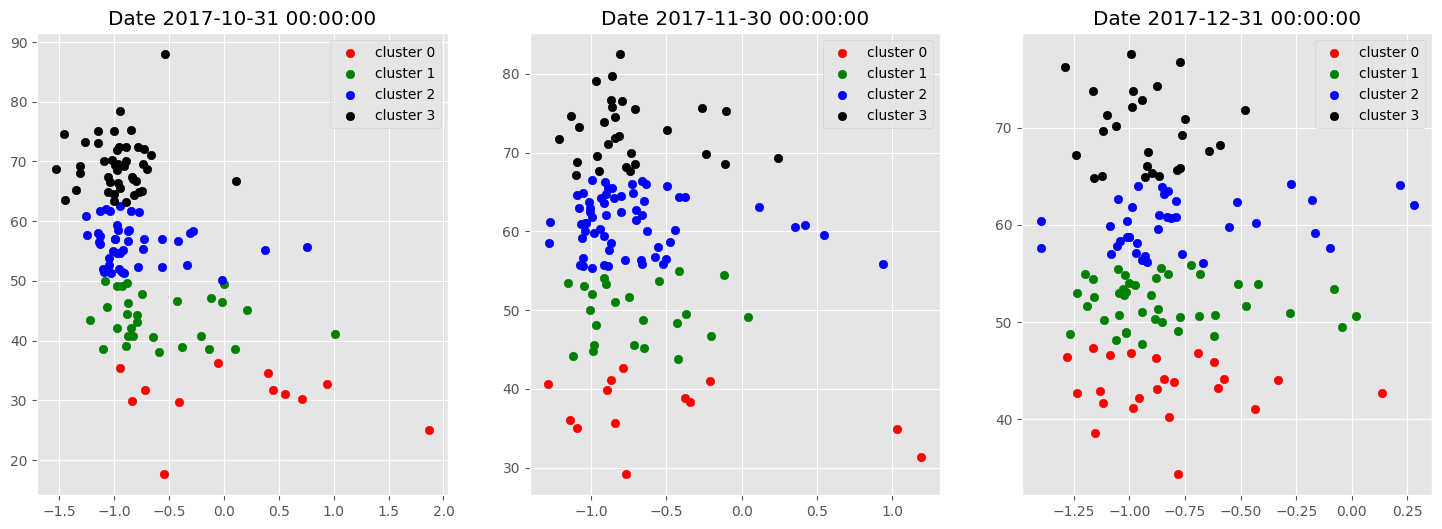

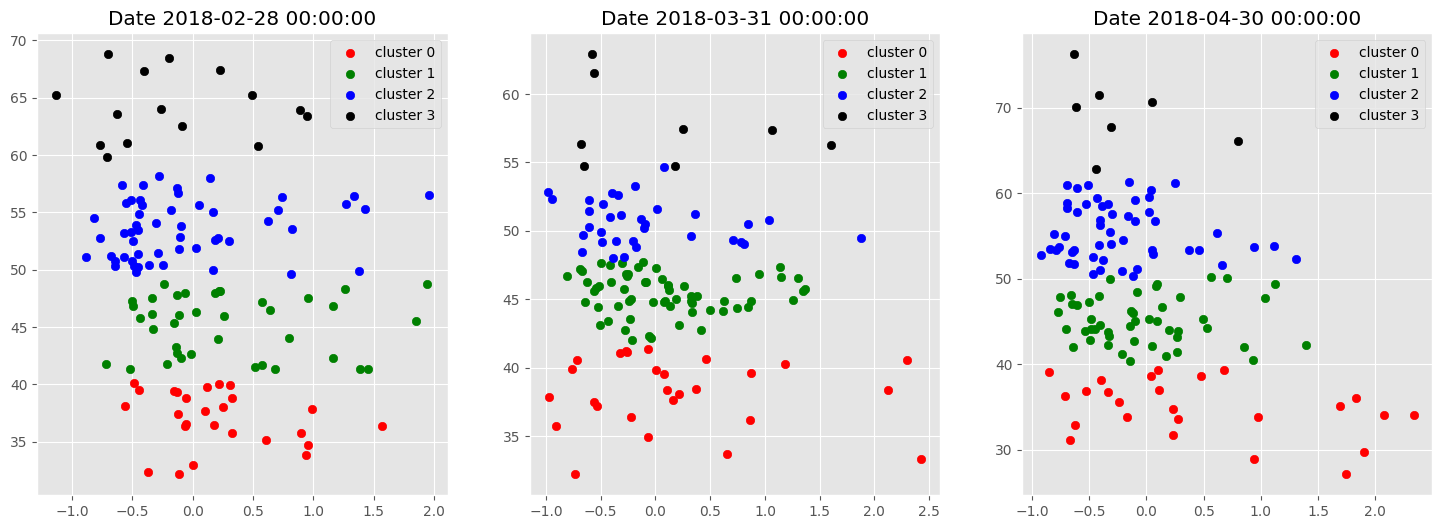

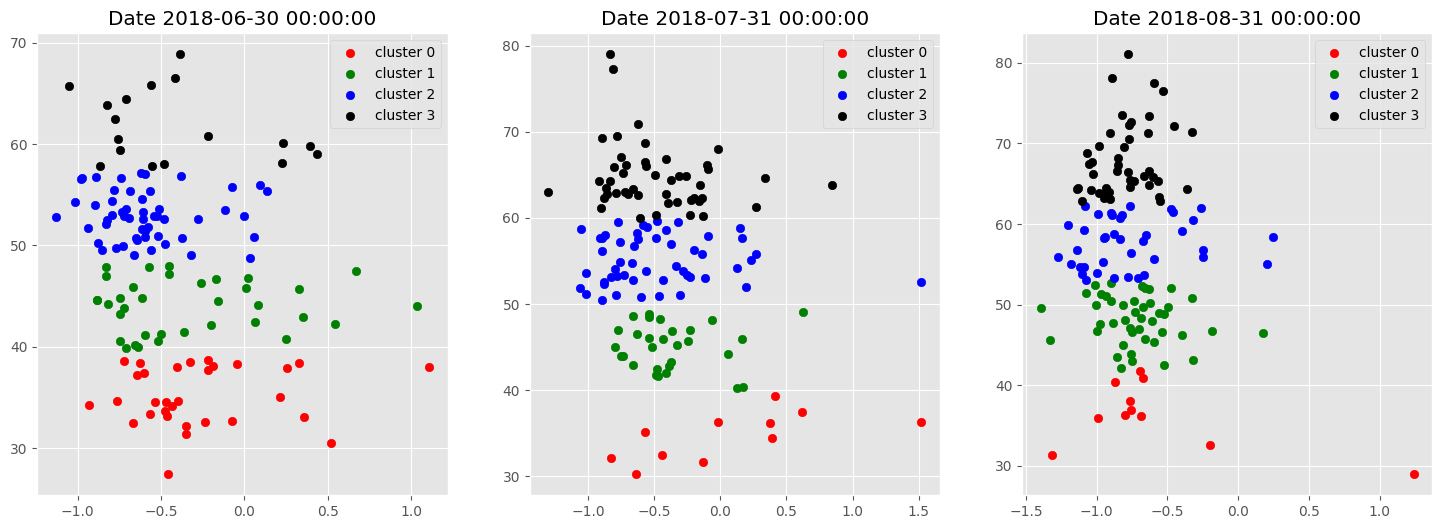

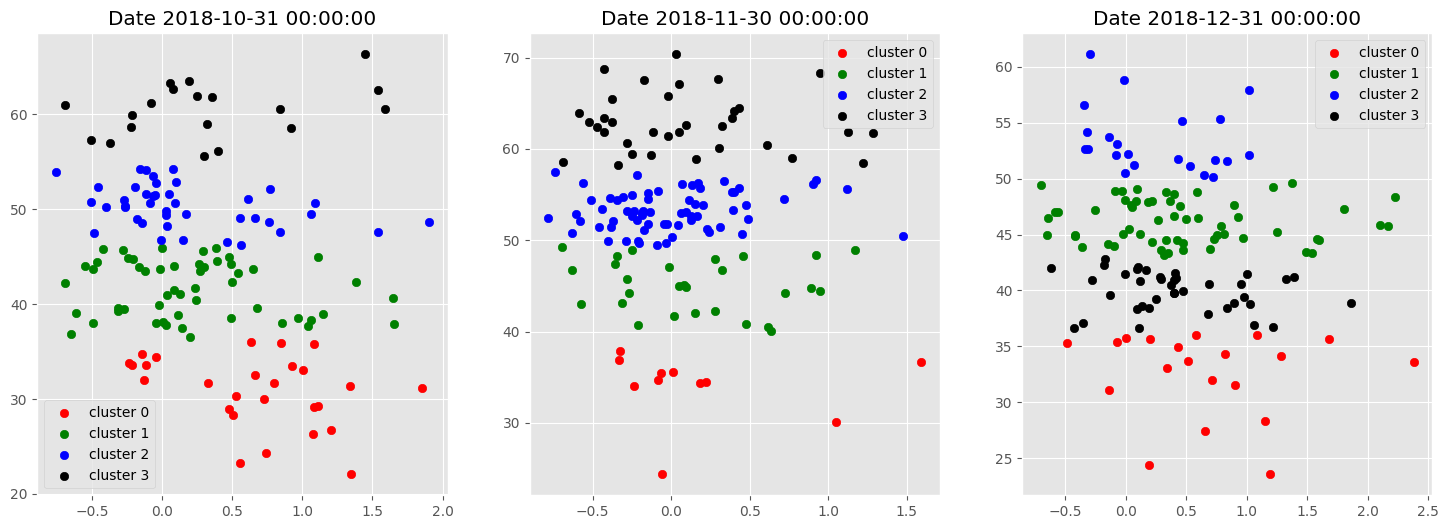

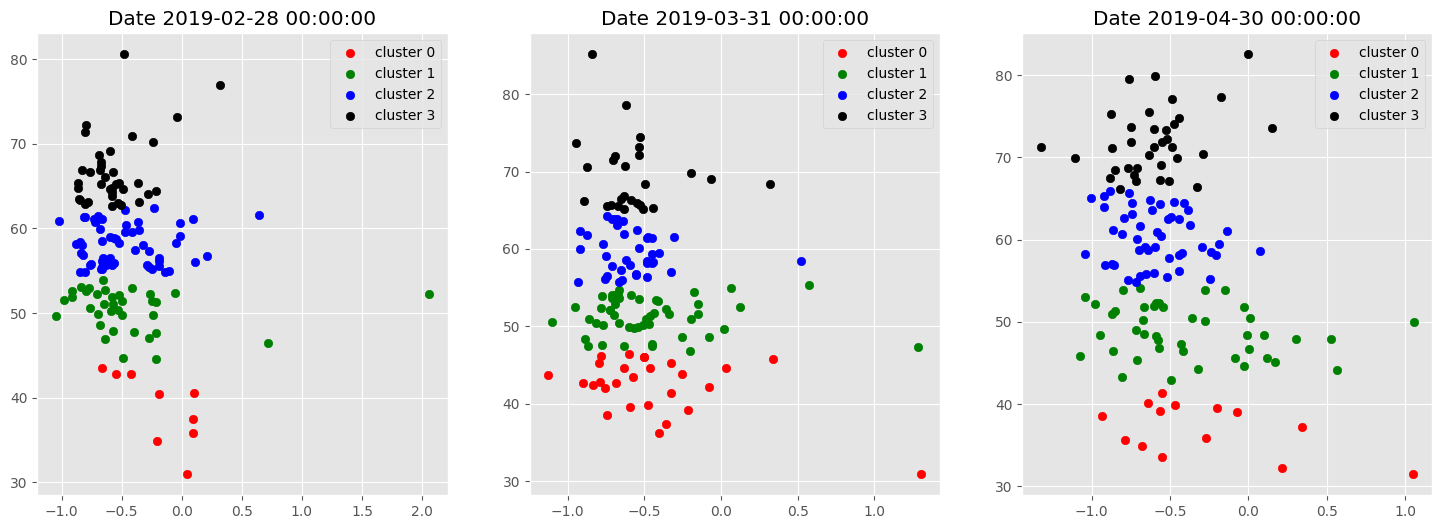

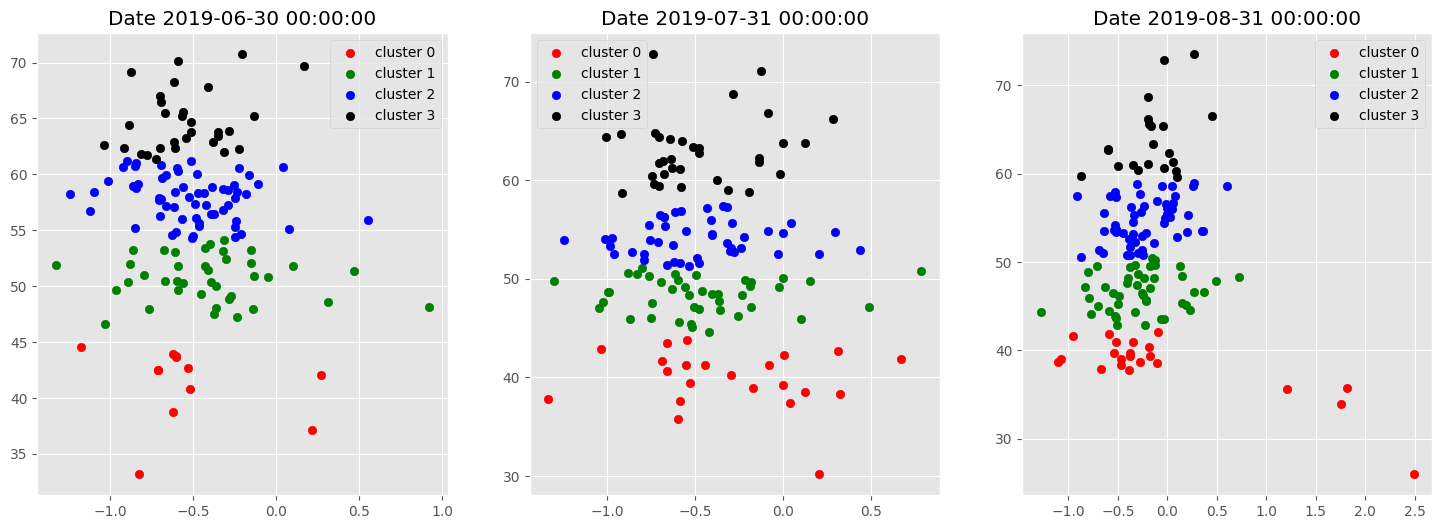

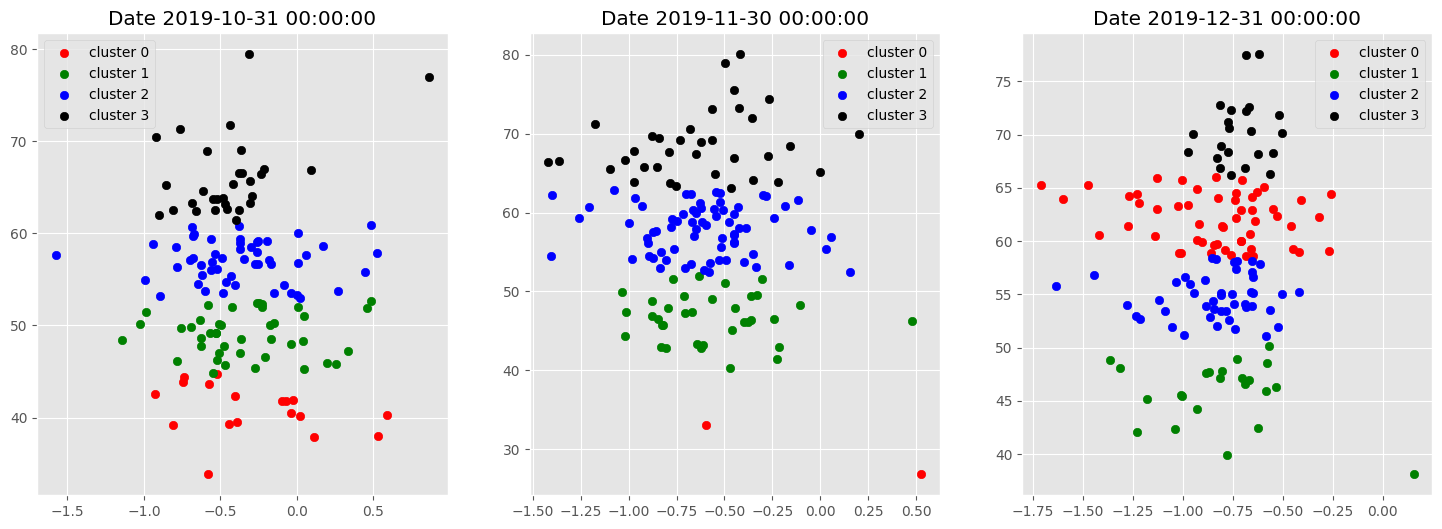

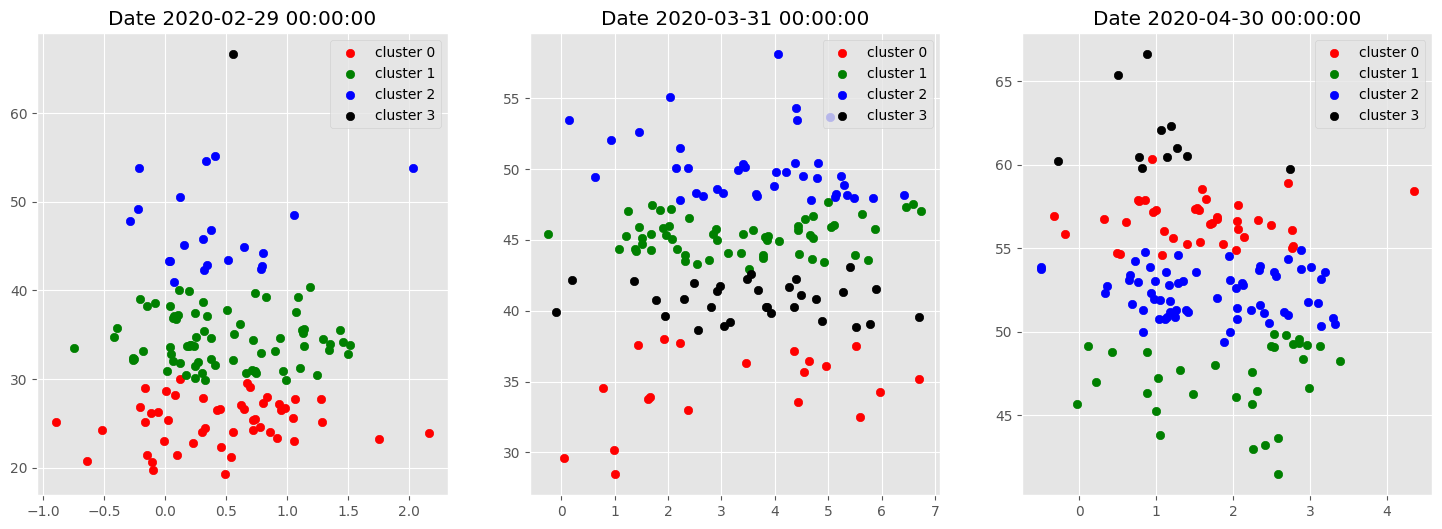

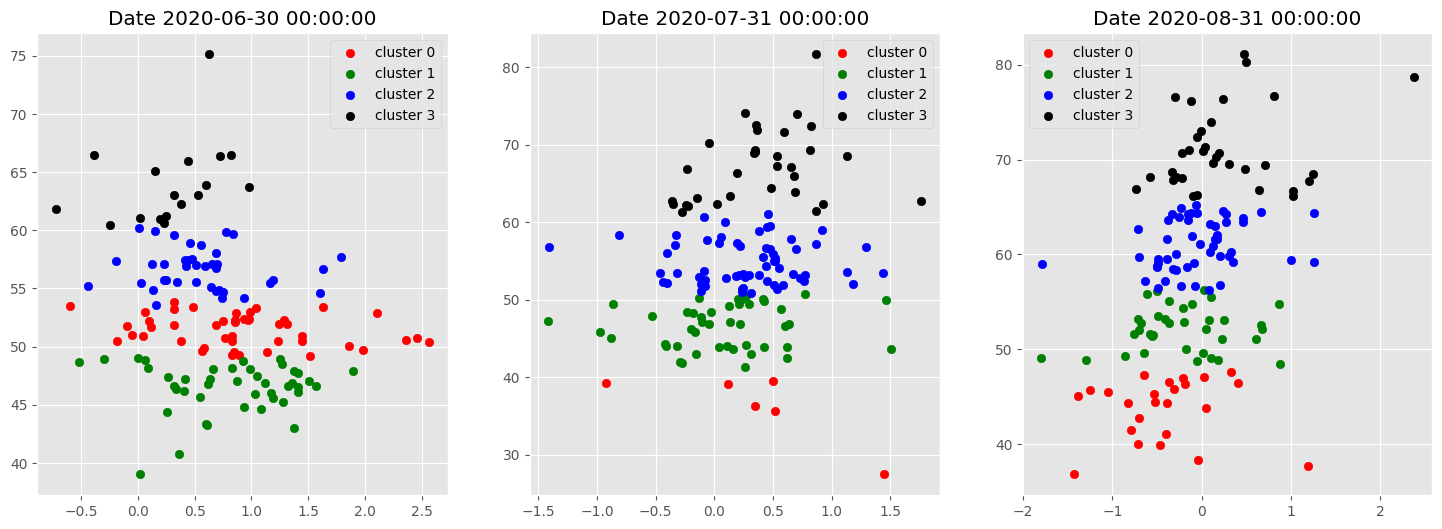

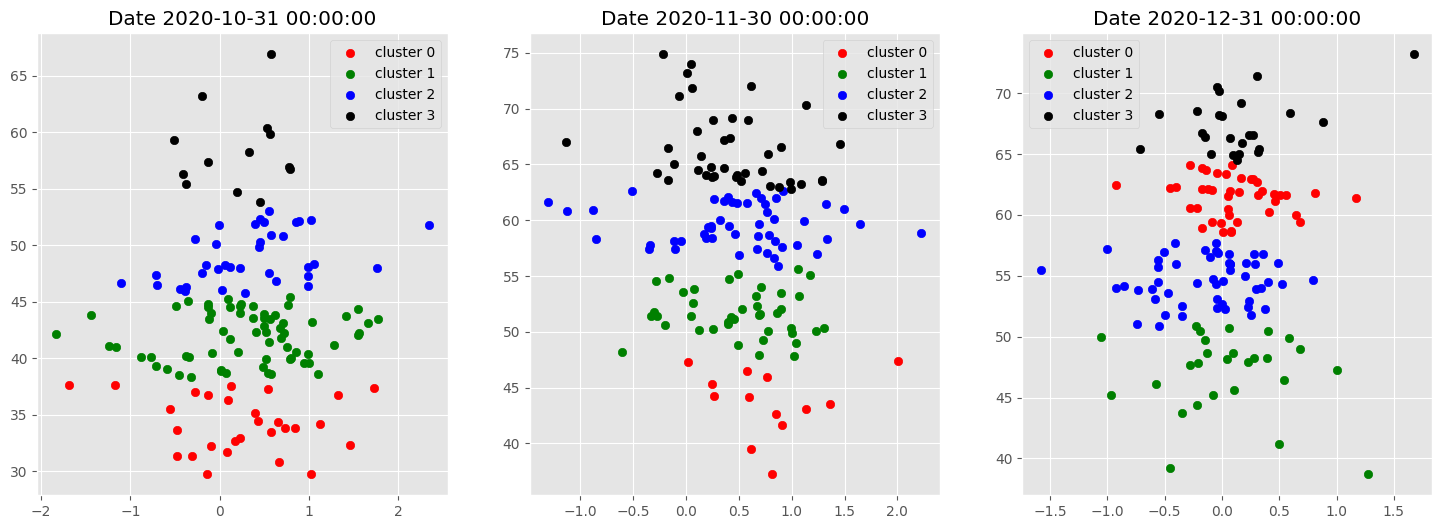

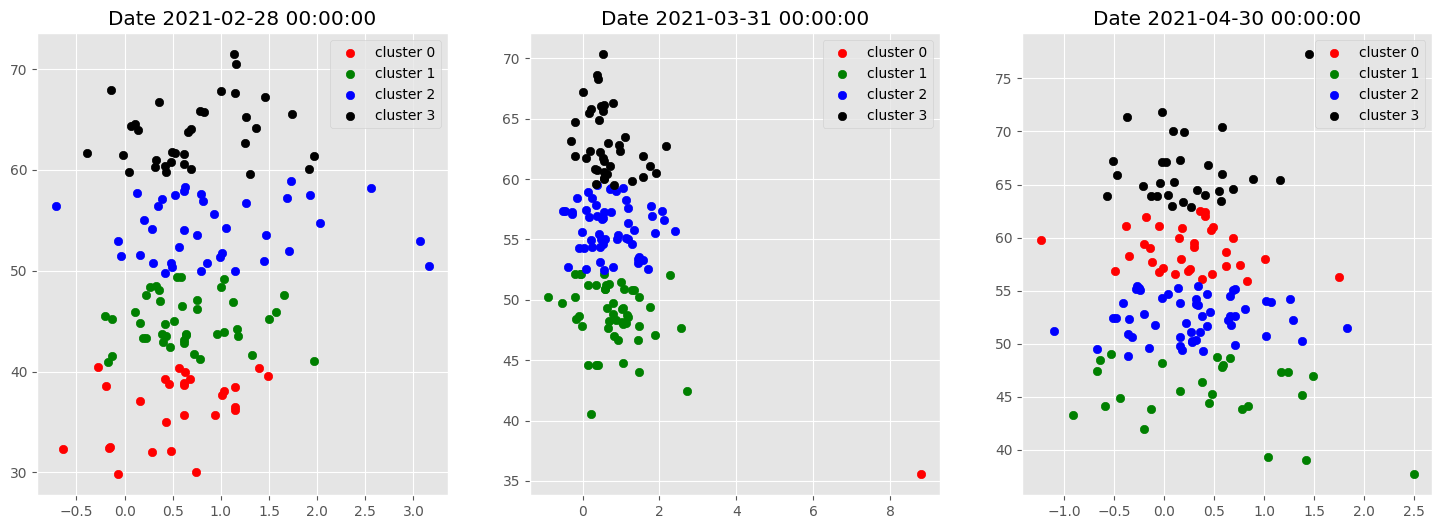

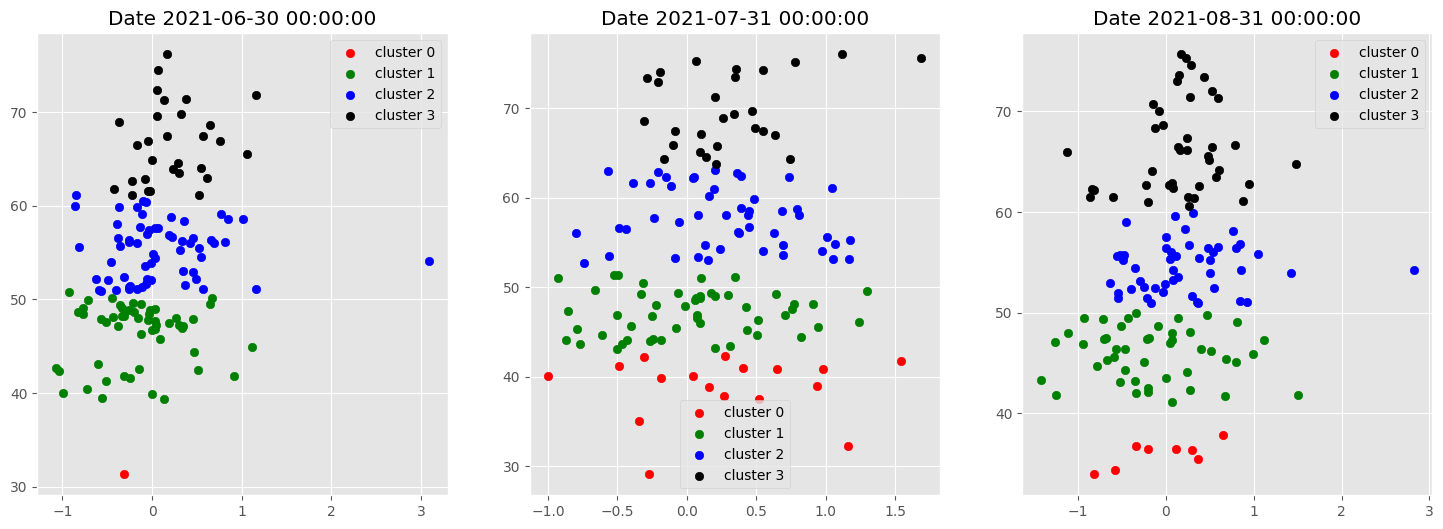

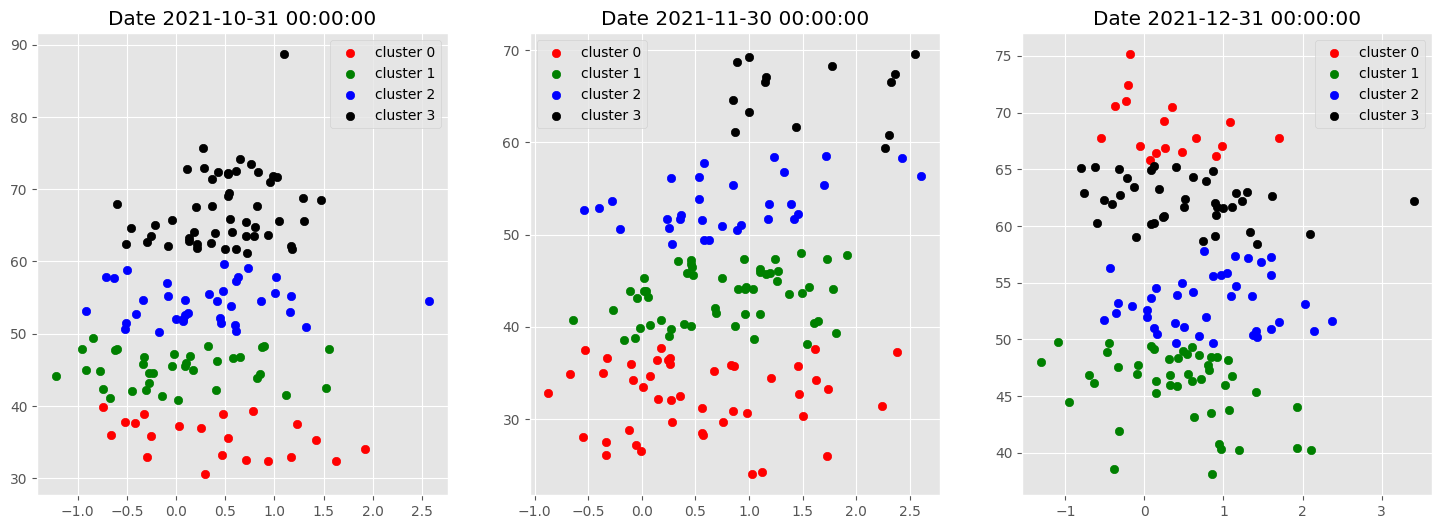

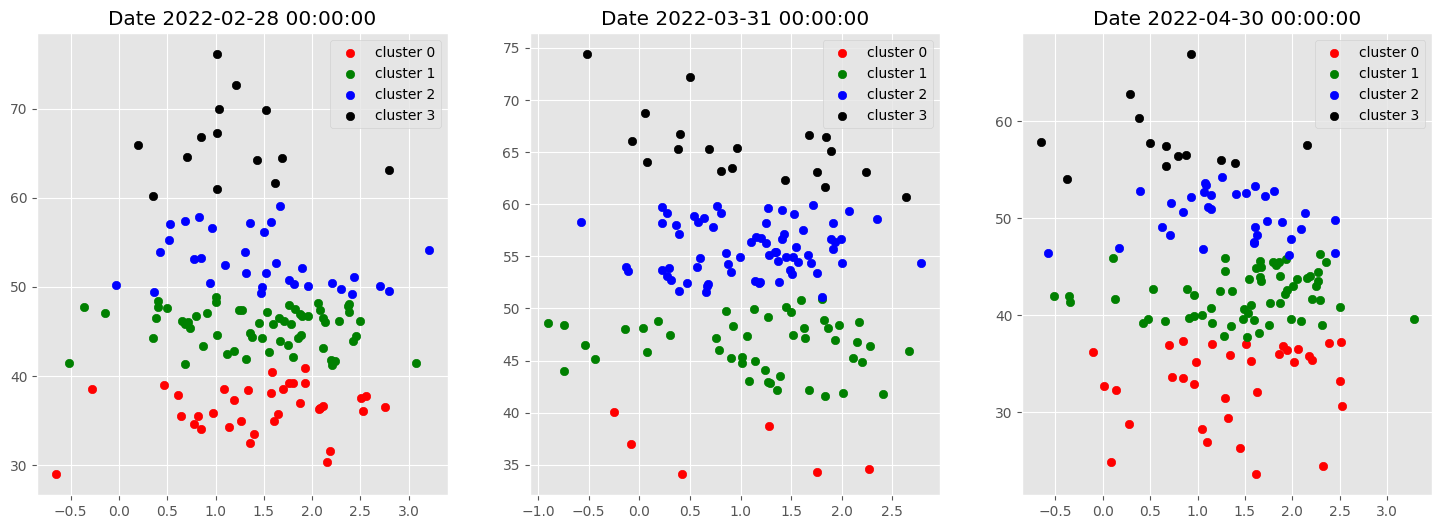

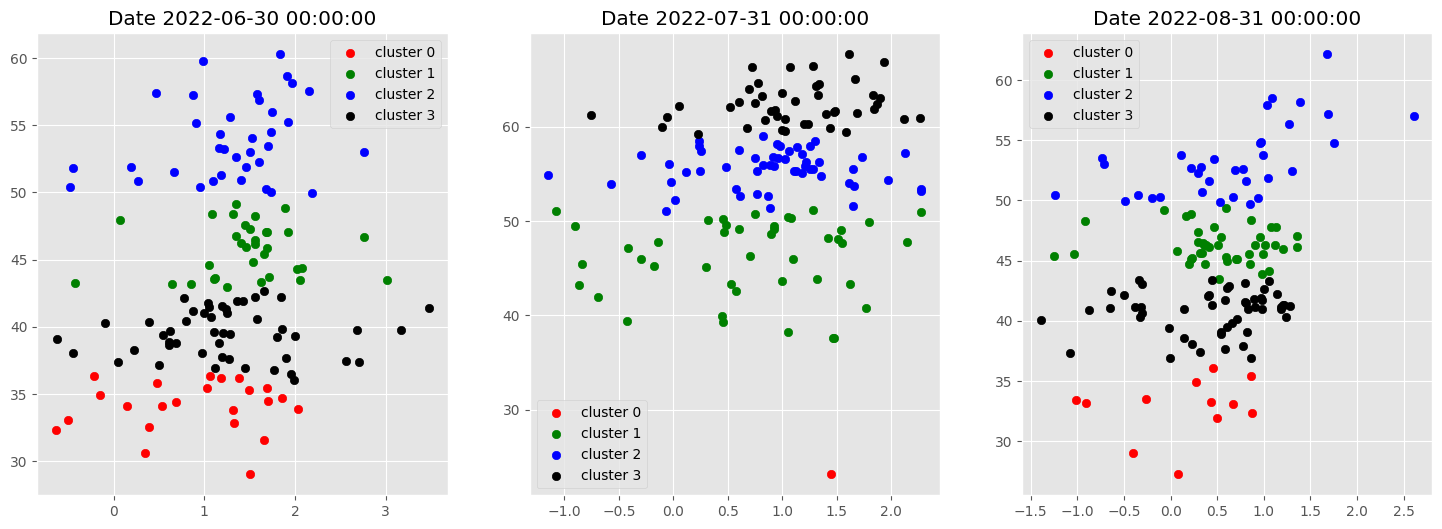

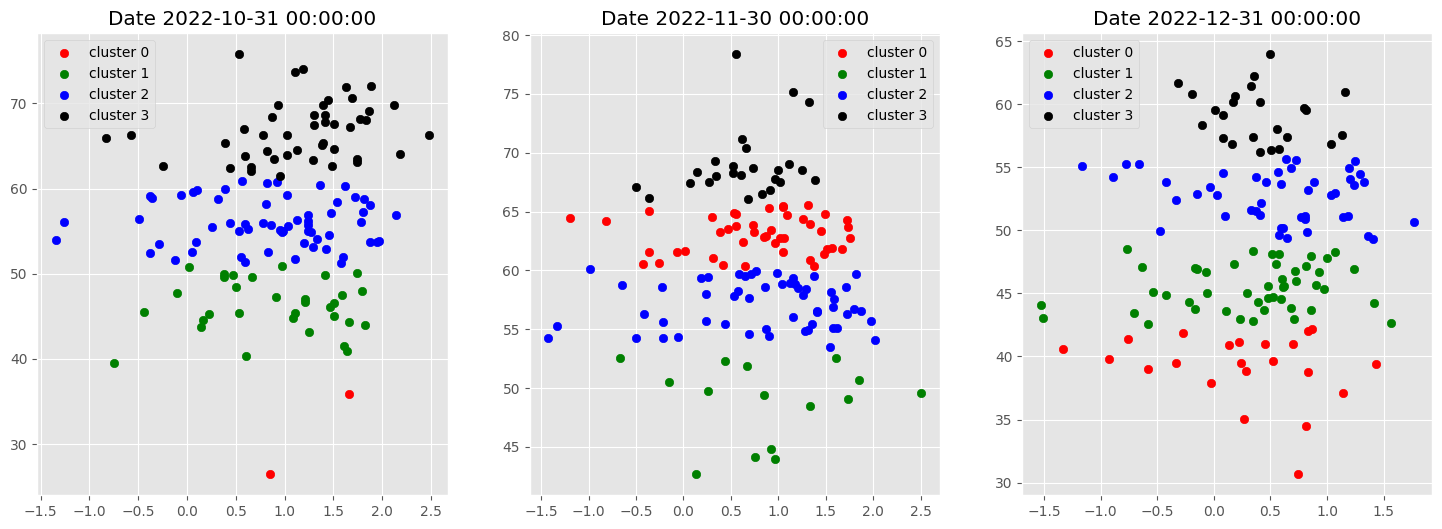

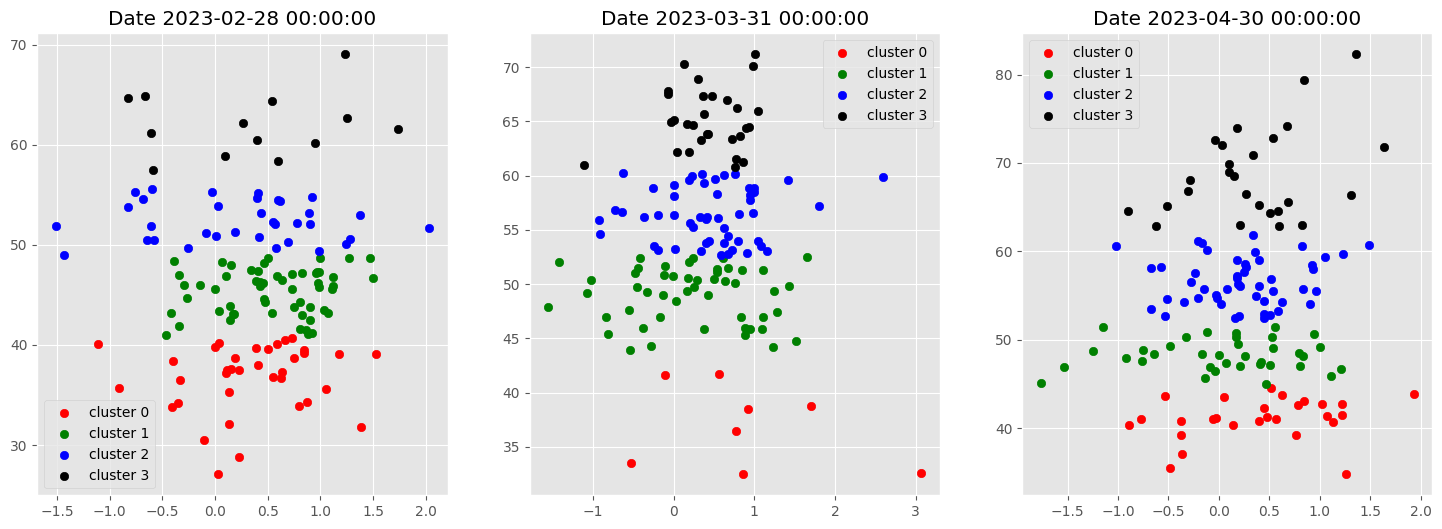

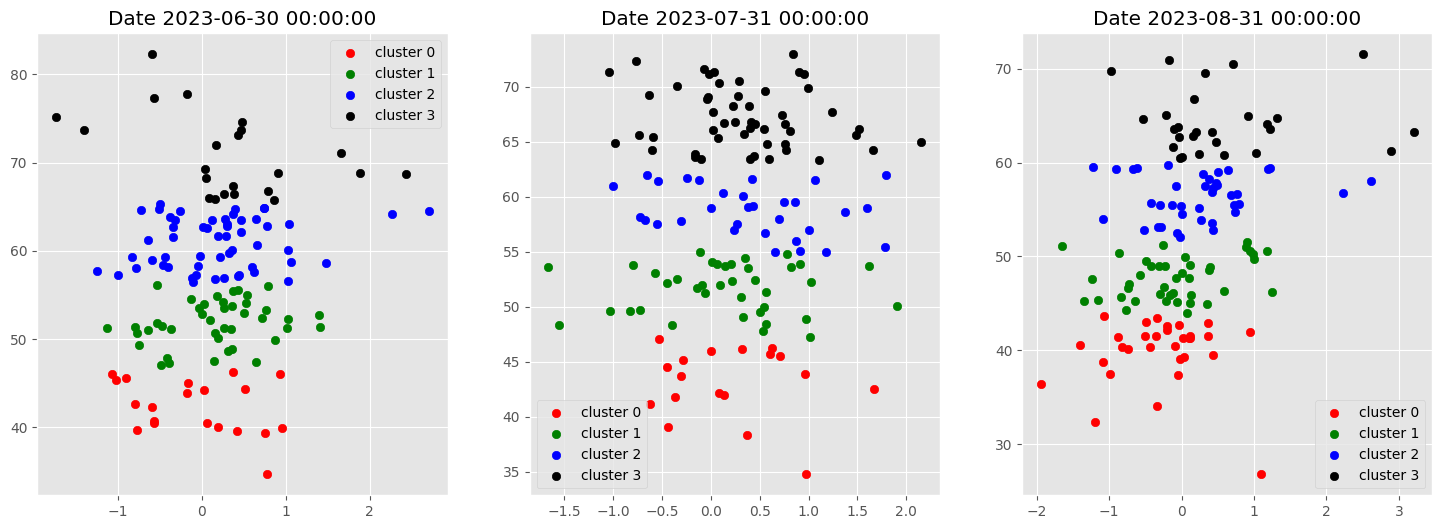

In [67]:
plt.style.use('ggplot')
c=0
temp = []
for i in data.index.get_level_values('date').unique().tolist():
    if c<3:
        temp.append(i)
        c+=1
    else:
        g1 = data.xs(temp[0], level=0)
        g2 = data.xs(temp[1], level=0)
        g3 = data.xs(temp[2], level=0)
        # plt.title(f'Date {i}')
        plot_clusters((g1,temp[0]),(g2,temp[1]),(g3,temp[2]))
        c=0
        temp=[]
for i in temp:
    g = data.xs(i, level=0)
    plt.title(f'Date {i}')
    plot_clusters_indv(g)

Now we can use cluster 3 to select stocks with RSI momentum around 70 and can select these stocks as they have good momentum